In [11]:
%matplotlib notebook

In [12]:
# Dependencies
import pandas as pd 
import requests
import json
import random
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder

# Google API Key
from config import gkey

file_path = "Resources/winemag-data_first150k.csv"
data = pd.read_csv("Resources/winemag-data_first150k.csv") 

# Preview the first 50 lines of the loaded data
data.head(50)


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


In [13]:
# Drop columns no needed
data.drop(columns=["Unnamed: 0", "description", "region_2"], inplace=True)

# Remove missing values
data.dropna(inplace=True)

#Order DataFrame Columns
data = data[["designation", "winery", "variety", "region_1", "province", "country", "price", "points"]]
data.head(10)

,designation,winery,variety,region_1,province,country,price,points
0,Martha's Vineyard,Heitz,Cabernet Sauvignon,Napa Valley,California,US,235.0,96
1,Carodorum Selección Especial Reserva,Bodega Carmen Rodríguez,Tinta de Toro,Toro,Northern Spain,Spain,110.0,96
2,Special Selected Late Harvest,Macauley,Sauvignon Blanc,Knights Valley,California,US,90.0,96
3,Reserve,Ponzi,Pinot Noir,Willamette Valley,Oregon,US,65.0,96
4,La Brûlade,Domaine de la Bégude,Provence red blend,Bandol,Provence,France,66.0,95
5,Numanthia,Numanthia,Tinta de Toro,Toro,Northern Spain,Spain,73.0,95
6,San Román,Maurodos,Tinta de Toro,Toro,Northern Spain,Spain,65.0,95
7,Carodorum Único Crianza,Bodega Carmen Rodríguez,Tinta de Toro,Toro,Northern Spain,Spain,110.0,95
8,Silice,Bergström,Pinot Noir,Chehalem Mountains,Oregon,US,65.0,95
9,Gap's Crown Vineyard,Blue Farm,Pinot Noir,Sonoma Coast,California,US,60.0,95


In [14]:
# Sample for project purpose
sample = data.sample(n=3000, axis=0, random_state = 4)
sample.reset_index(drop = True, inplace=True)

sample

,designation,winery,variety,region_1,province,country,price,points
0,Thorn,Grant Burge,Riesling,Eden Valley,South Australia,Australia,19.0,88
1,Doganella Il Tintorosso,Tommasi,Red Blend,Maremma,Tuscany,Italy,15.0,87
2,Reserve,Castoro Cellars,Cabernet Sauvignon,Paso Robles,California,US,28.0,87
3,Ellenbach Vineyard,Etude,Pinot Noir,Sonoma Coast,California,US,60.0,90
4,Il Monovitigno,Benanti,Nero d'Avola,Sicilia,Sicily & Sardinia,Italy,30.0,88
...,...,...,...,...,...,...,...,...
2995,Brut,Jean-Baptiste Adam,Sparkling Blend,Crémant d'Alsace,Alsace,France,25.0,84
2996,Hazard Hill,Plantagenet,Shiraz,Western Australia,Western Australia,Australia,13.0,90
2997,Estate Vineyard,Rutherford Ranch,Cabernet Sauvignon,Rutherford,California,US,70.0,88
2998,Goodin Vineyard,MacPhail,Pinot Noir,Sonoma Coast,California,US,65.0,94


In [11]:
#SKIP IF ALREADY HAVE DATASET
sample["latitud"] = ""
sample["longitud"] = ""
sample["elevation"] = ""


# Build URL using the Google Geocoding API
base_url = "https://maps.googleapis.com/maps/api/geocode/json"

# Counter
count = 1

# Iterate dataframe for filling Latitud and Longitud columns
for index, row in sample.iterrows():
    
    # Build winery location search
    winery_loc = row["winery"] + "," + row["region_1"]  + "," +  row["province"]
    
    # Parameters for API request
    params = {"address": winery_loc, "key": gkey}
    
    try:

        # Run request
        response = requests.get(base_url, params=params)

        # Convert to JSON
        geo_data = response.json()

        # Extract lat/lng and fill columns
        sample.loc[index, 'latitud'] = geo_data["results"][0]["geometry"]["location"]["lat"]
        sample.loc[index, 'longitud'] = geo_data["results"][0]["geometry"]["location"]["lng"]
    
        # print Winery location found
        print(f"Processing row {count} Winery location {winery_loc} {sample.loc[index, 'latitud']} {sample.loc[index, 'longitud']} found")
        count += 1
        
    except (KeyError, IndexError):
        print("Winery not found" )
        
#test.head(10)

# Counter
count = 1

# Iterate dataframe for filling Elevation column
for index, row in sample.iterrows():
    lat = row["latitud"]
    lng = row["longitud"]
    
    try:
        # Build URL using the Google Elevation API
        url_ele = f"https://maps.googleapis.com/maps/api/elevation/json?locations={lat},{lng}&key={gkey}"
        
        # Run request
        response = requests.get(url_ele)

        # Convert to JSON
        geo_data = response.json()

        # Extract elevation and fill column
        sample.loc[index, 'elevation'] = geo_data["results"][0]["elevation"]
    
        # print Winery elevation found
        print(f"Processing row {count} Winery elevation {sample.loc[index, 'elevation']} found")
        count += 1
        
    except (KeyError, IndexError):
        print("Elevation not found" )

#test.head(10)

sample.to_csv("Resources/winery_data.csv", index=False)


Processing row 1 Winery location Grant Burge,Eden Valley,South Australia -34.5615916 138.9754373 found
Processing row 2 Winery location Tommasi,Maremma,Tuscany 42.6086111 11.6966667 found
Processing row 3 Winery location Castoro Cellars,Paso Robles,California 35.5772607 -120.722921 found
Processing row 4 Winery location Etude,Sonoma Coast,California 38.2458215 -122.3150228 found
Processing row 5 Winery location Benanti,Sicilia,Sicily & Sardinia 37.5999938 14.0153557 found
Processing row 6 Winery location Banfi,Toscana,Tuscany 42.980621 11.400659 found
Processing row 7 Winery location Finca Antigua,La Mancha,Central Spain 39.6310835 -2.8920419 found
Processing row 8 Winery location Epiphany,Santa Barbara County,California 34.6669689 -120.1147479 found
Processing row 9 Winery location Concannon,Livermore Valley,California 37.666199 -121.7397388 found
Processing row 10 Winery location Sandrone,Barolo,Piedmont 44.6208903 7.954625300000001 found
Processing row1 Winery elevation 323.24249267

In [15]:
sample = pd.read_csv("Resources/winery_data.csv") 
sample.dropna(inplace=True)
print(sample.count())
sample.head()

designation    2912
winery         2912
variety        2912
region_1       2912
province       2912
country        2912
price          2912
points         2912
latitud        2912
longitud       2912
elevation      2912
dtype: int64


,designation,winery,variety,region_1,province,country,price,points,latitud,longitud,elevation
0,Thorn,Grant Burge,Riesling,Eden Valley,South Australia,Australia,19.0,88,-34.561592,138.975437,323.242493
1,Doganella Il Tintorosso,Tommasi,Red Blend,Maremma,Tuscany,Italy,15.0,87,42.608611,11.696667,354.988892
2,Reserve,Castoro Cellars,Cabernet Sauvignon,Paso Robles,California,US,28.0,87,35.577261,-120.722921,280.324707
3,Ellenbach Vineyard,Etude,Pinot Noir,Sonoma Coast,California,US,60.0,90,38.245822,-122.315023,16.873728
4,Il Monovitigno,Benanti,Nero d'Avola,Sicilia,Sicily & Sardinia,Italy,30.0,88,37.599994,14.015356,622.540649


In [16]:
# Distribution by Country
bycountry = pd.DataFrame(sample["price"].groupby(sample['country']).count())
bycountry

,price
country,
Argentina,131
Australia,135
Canada,3
France,314
Italy,569
Spain,224
US,1536


<IPython.core.display.Javascript object>


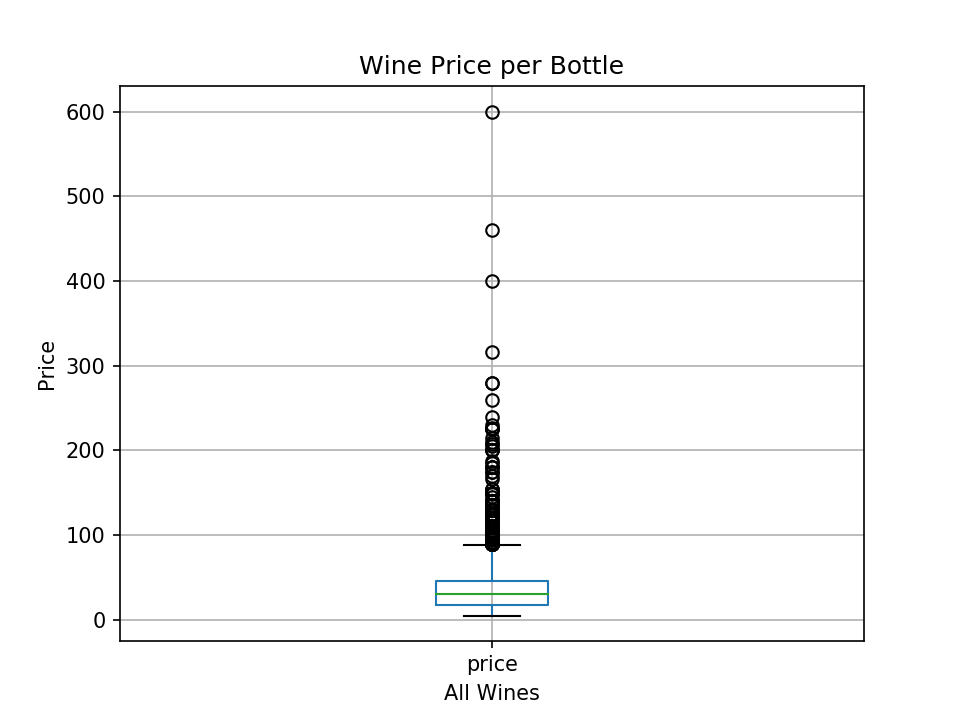

In [17]:
# Create a boxplot to compare means
fig = plt.figure()
fig = sample.boxplot("price", figsize=(20, 10))
fig.set_xlabel("All Wines")
fig.set_ylabel('Price')
fig.set_title('Wine Price per Bottle')
plt.savefig("Output/Price_Boxplot.png")

In [18]:
price = sample["price"]

# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = price.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of price is: {lowerq}")
print(f"The upper quartile of price is: {upperq}")
print(f"The interquartile range of price is: {iqr}")
print(f"The the median of price is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of price is: 18.0
The upper quartile of price is: 46.0
The interquartile range of price is: 28.0
The the median of price is: 30.0 
Values below -24.0 could be outliers.
Values above 88.0 could be outliers.


In [19]:
mean_numpy = np.mean(price)
print(f"The mean price for all wines is {mean_numpy}")

median_numpy = np.median(price)
print(f"The median price for all wines is {median_numpy}")

mode_scipy = st.mode(price)
print(f"The mode price for all wines is {mode_scipy}")

The mean price for all wines is 37.72493131868132
The median price for all wines is 30.0
The mode price for all wines is ModeResult(mode=array([30.]), count=array([146]))


In [20]:
#Drop Canada from Sample
sample = sample[sample.country != "Canada"]
print(sample.count())

designation    2909
winery         2909
variety        2909
region_1       2909
province       2909
country        2909
price          2909
points         2909
latitud        2909
longitud       2909
elevation      2909
dtype: int64


<IPython.core.display.Javascript object>


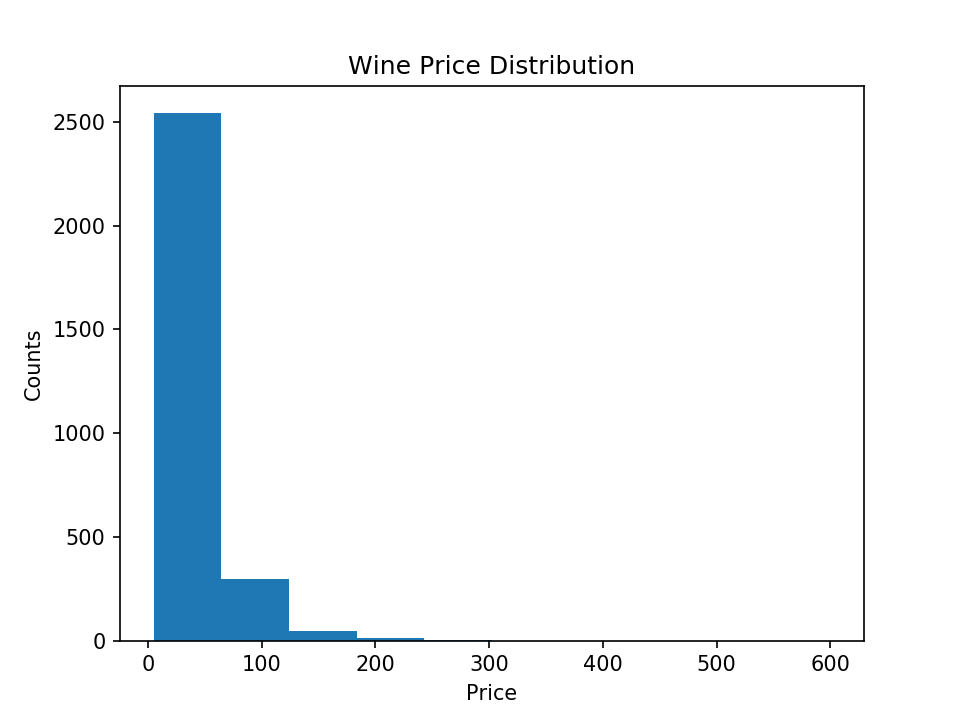

NormaltestResult(statistic=41.383671877823176, pvalue=1.031929032806866e-09)


In [21]:
# Characterize the data set using matplotlib and stats.normaltest
price = sample["price"]

fig = plt.figure()

plt.hist(price)
plt.title('Wine Price Distribution')
plt.xlabel("Price")
plt.ylabel('Counts')
plt.show()
print(st.normaltest(price.sample(50)))
plt.savefig("Output/Prices_Boxplot.png")

In [22]:
#Drop Wines under $100 USD 
sample = sample[sample.price <= 100]
print(sample.count())

designation    2809
winery         2809
variety        2809
region_1       2809
province       2809
country        2809
price          2809
points         2809
latitud        2809
longitud       2809
elevation      2809
dtype: int64


<IPython.core.display.Javascript object>


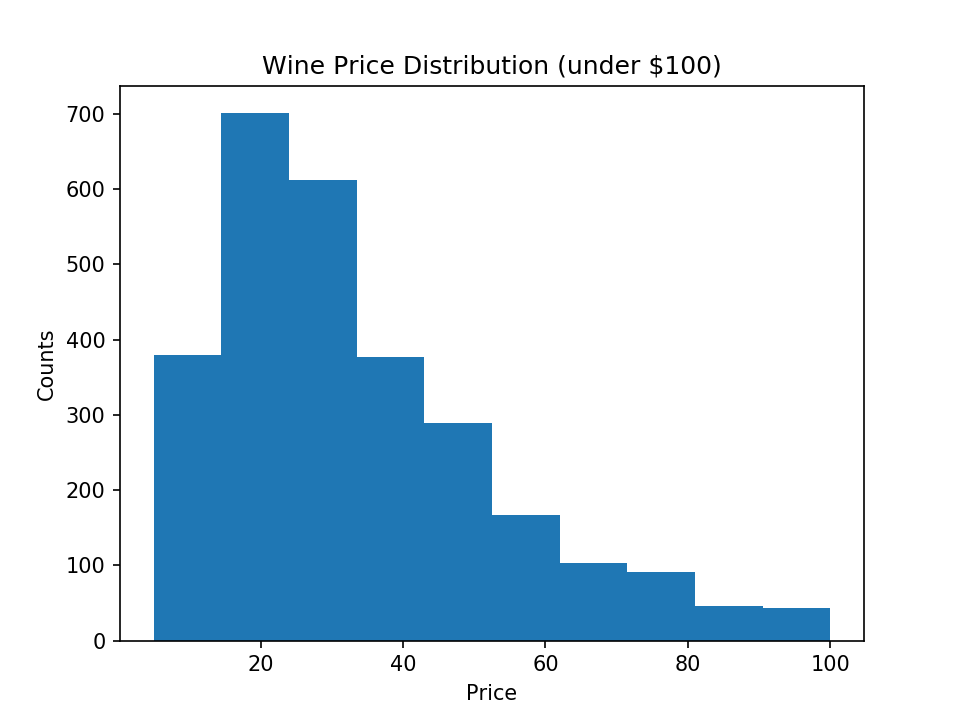

NormaltestResult(statistic=6.465352473616069, pvalue=0.03945177508803819)


In [23]:
# Characterize the data set using matplotlib and stats.normaltest
price = sample["price"]

fig = plt.figure()

plt.hist(price)
plt.title('Wine Price Distribution (under $100)')
plt.xlabel("Price")
plt.ylabel('Counts')
plt.show()
print(st.normaltest(price.sample(50)))
plt.savefig("Output/Pricesunder100_Boxplot.png")

In [24]:
sample.describe()

,price,points,latitud,longitud,elevation
count,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000
mean,33.421858,88.090780,34.552359,-58.581826,270.499286
std,20.057513,3.215317,21.708023,73.716641,320.600963
min,5.000000,80.000000,-42.809838,-123.799459,0.666450
25%,18.000000,86.000000,37.599994,-122.265389,66.650963
50%,28.000000,88.000000,39.086566,-118.040206,188.161011
75%,45.000000,90.000000,44.663166,7.285526,352.602264
max,100.000000,98.000000,49.236201,153.288288,6907.093262


In [25]:
mean_numpy = np.mean(price)
print(f"The mean price for all wines is {mean_numpy}")

median_numpy = np.median(price)
print(f"The median price for all wines is {median_numpy}")

mode_scipy = st.mode(price)
print(f"The mode price for all wines is {mode_scipy}")

The mean price for all wines is 33.42185831256675
The median price for all wines is 28.0
The mode price for all wines is ModeResult(mode=array([30.]), count=array([145]))


In [26]:
sample.groupby(["variety"]).mean()

,price,points,latitud,longitud,elevation
variety,,,,,
Aglianico,31.00000,88.400000,40.985284,6.350525,396.286303
Albana,21.00000,92.000000,44.596761,11.218640,24.282932
Albariño,21.50000,88.000000,39.427081,-64.740419,122.267037
Aligoté,20.00000,88.000000,47.169742,4.919957,404.149475
Alsace white blend,38.75000,86.750000,48.143460,7.325646,229.505253
...,...,...,...,...,...
White Blend,22.96875,86.875000,36.629291,-18.591914,371.076898
White Riesling,45.00000,95.000000,38.359256,-122.500636,98.696121
Xarel-lo,15.00000,87.000000,41.384722,1.806667,288.262054


In [27]:
sample.groupby(["winery"]).mean()

,price,points,latitud,longitud,elevation
winery,,,,,
14 Hands,22.000000,87.000000,46.211224,-119.746524,218.390427
42°S,20.000000,89.000000,-41.454520,145.970665,859.662781
460 Casina Bric,60.000000,88.000000,44.618181,7.928433,439.171570
:Nota Bene,27.000000,91.000000,47.519492,-122.312620,6.029534
Abacela,45.000000,88.000000,43.126965,-123.447495,200.858932
...,...,...,...,...,...
Zisola,55.000000,91.500000,36.871317,15.047227,133.781647
Zolo,25.000000,86.000000,-32.889459,-68.845839,768.765442
Zonin,8.666667,83.666667,39.391962,-19.046365,12.072543


In [28]:
summary = sample.groupby("country")["price", "points"].agg([np.mean, np.median, np.var, np.std])
summary

C:\Users\egarz\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


price                                   points         \
                mean median         var        std       mean median   
country                                                                
Argentina  19.389313   15.0  182.239577  13.499614  86.106870     86   
Australia  30.099237   22.0  450.951615  21.235621  88.152672     88   
France     34.234266   28.0  488.460716  22.101147  88.681818     89   
Italy      34.035382   27.0  442.564044  21.037206  88.322160     88   
Spain      24.451613   17.0  347.711768  18.647031  86.622120     86   
US         35.849370   32.0  359.793364  18.968220  88.274718     88   

                                
                 var       std  
country                         
Argentina   9.850029  3.138476  
Australia   8.222666  2.867519  
France      8.147528  2.854387  
Italy       6.741168  2.596376  
Spain       8.375064  2.893970  
US         11.800974  3.435255

In [29]:
sample.groupby(["province"]).mean()

,price,points,latitud,longitud,elevation
province,,,,,
Alsace,34.413043,88.586957,48.144007,7.320987,235.165414
Andalucia,28.600000,89.200000,37.088492,-4.940519,248.826137
Arizona,23.666667,85.000000,33.020932,-110.404960,1312.940633
Australia Other,12.111111,84.222222,-30.504981,147.011872,148.545203
Beaujolais,13.000000,85.500000,43.756540,-19.838907,338.415249
Bordeaux,28.380952,88.380952,44.620859,-3.745051,46.620731
Burgundy,48.015385,89.400000,47.136313,4.596832,226.745930
California,37.037928,88.167438,37.431347,-121.706868,165.702172
Catalonia,25.333333,86.979167,40.721827,-0.154589,274.704380


In [30]:
print(f"Variety unique count", (len(sample["variety"].unique())))
print(f"Winery unique count", (len(sample["winery"].unique())))
print(f"Country unique count", (len(sample["country"].unique())))
print(f"Province unique count", (len(sample["province"].unique())))

Variety unique count 172
Winery unique count 1791
Country unique count 6
Province unique count 48


<IPython.core.display.Javascript object>


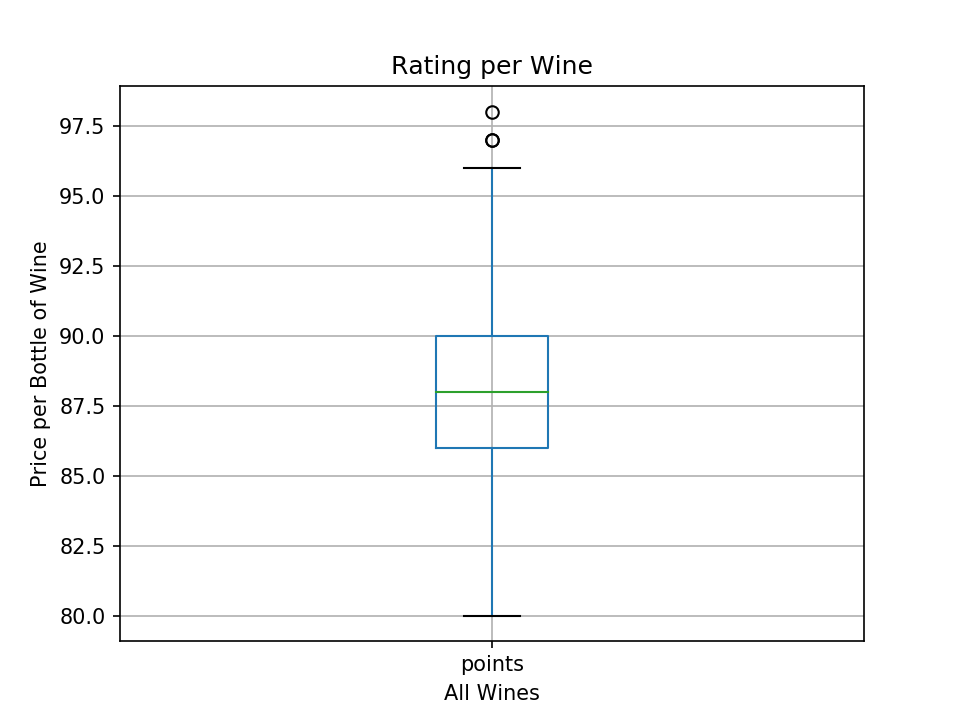

In [31]:
# Create a boxplot to compare means
fig = plt.figure()
fig = sample.boxplot("points", figsize=(20, 10))
fig.set_xlabel("All Wines")
fig.set_ylabel('Price per Bottle of Wine')
fig.set_title('Rating per Wine')
plt.savefig("Output/Rating_Boxplot.png")

<IPython.core.display.Javascript object>


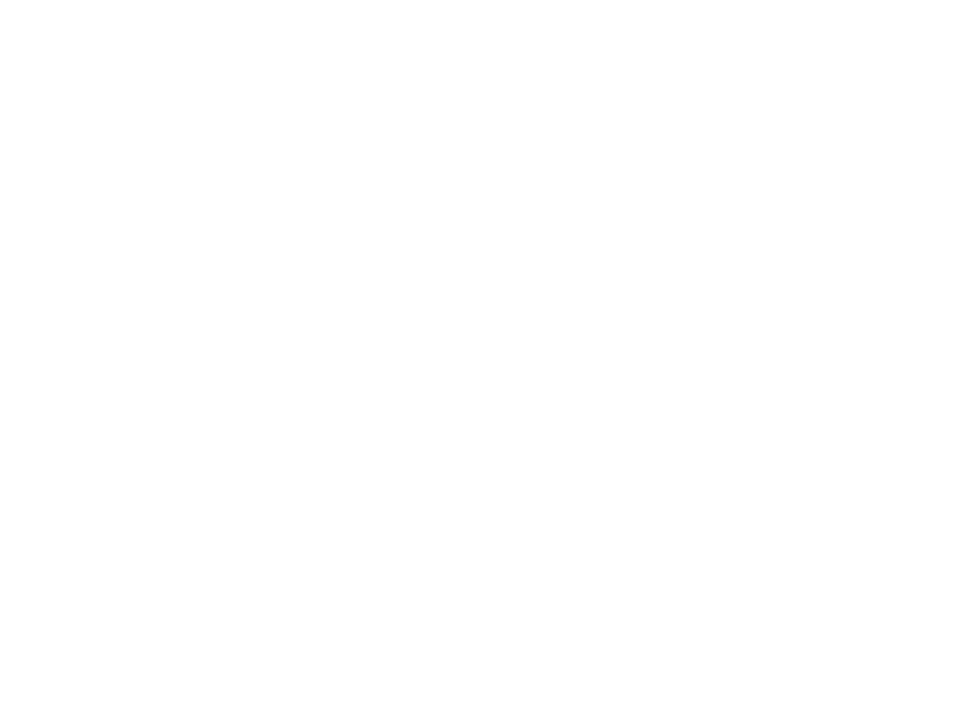

<IPython.core.display.Javascript object>


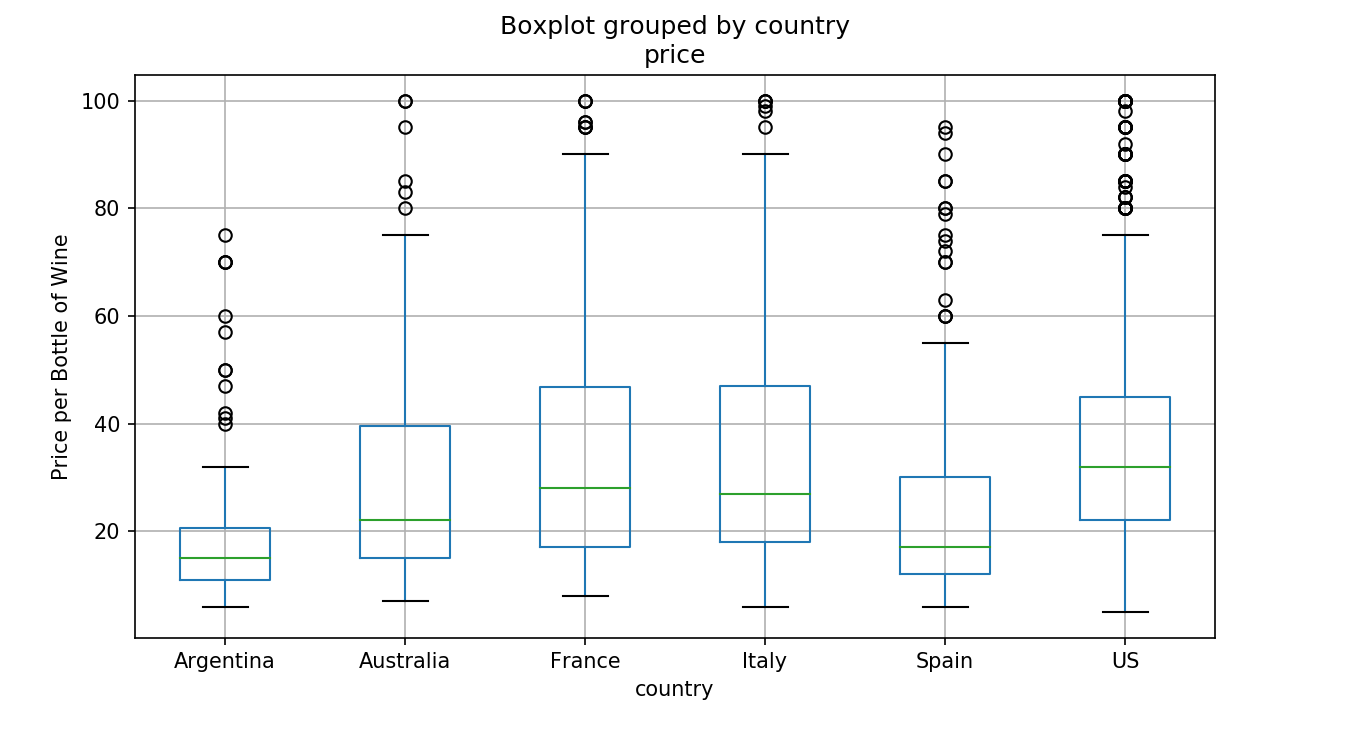

In [32]:
# Create a boxplot to compare means
fig = plt.figure()
sample.boxplot("price", by="country", figsize=(9, 5))
plt.ylabel('Price per Bottle of Wine')
plt.savefig("Output/PriceperCountry.png")

In [33]:
# Extract individual groups
group1 = sample[sample["country"] == "Argentina"]["price"]
group2 = sample[sample["country"] == "Australia"]["price"]
group3 = sample[sample["country"] == "France"]["price"]
group4 = sample[sample["country"] == "Italy"]["price"]
group5 = sample[sample["country"] == "Spain"]["price"]
group6 = sample[sample["country"] == "US"]["price"]

In [34]:
# Perform the ANOVA
st.f_oneway(group1, group2, group3, group4, group5, group6)

F_onewayResult(statistic=28.128659369780202, pvalue=6.700349494424998e-28)

<IPython.core.display.Javascript object>


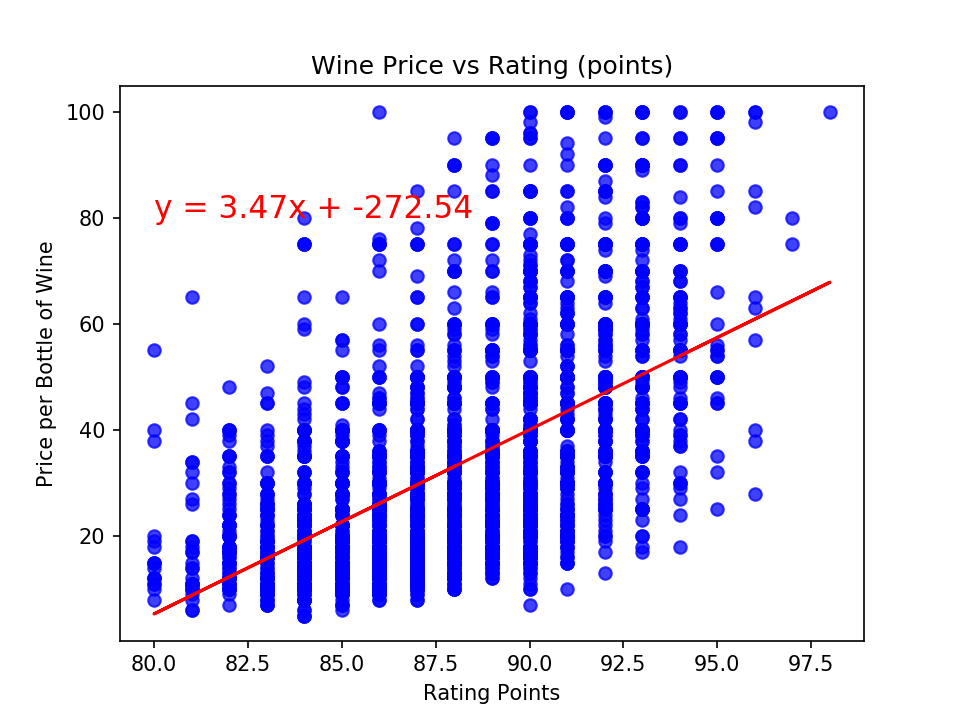

The correlation between both factors is 0.56
The r-squared is: 0.31001201962230474


In [35]:
fig = plt.figure()

# Create scatter plot based uponabove values
plt.scatter(sample["points"], sample["price"], marker="o", facecolors="b", alpha=0.75, label ="Precio vs Ratings")

# Calculate correlation
correlation = round(st.pearsonr(sample["points"], sample["price"])[0],2)
print(f"The correlation between both factors is {correlation}")

# Calculate linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(sample["points"], sample["price"])
regress_values = sample["points"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.plot(sample["points"],regress_values,"r-")
plt.annotate(line_eq,(80,80), fontsize=15,color="red")

#Lables
plt.title('Wine Price vs Rating (points)')
plt.xlabel("Rating Points")
plt.ylabel('Price per Bottle of Wine')

# Print chart to screen
plt.show()
plt.savefig("Output/price_rating_regress.png")

<IPython.core.display.Javascript object>


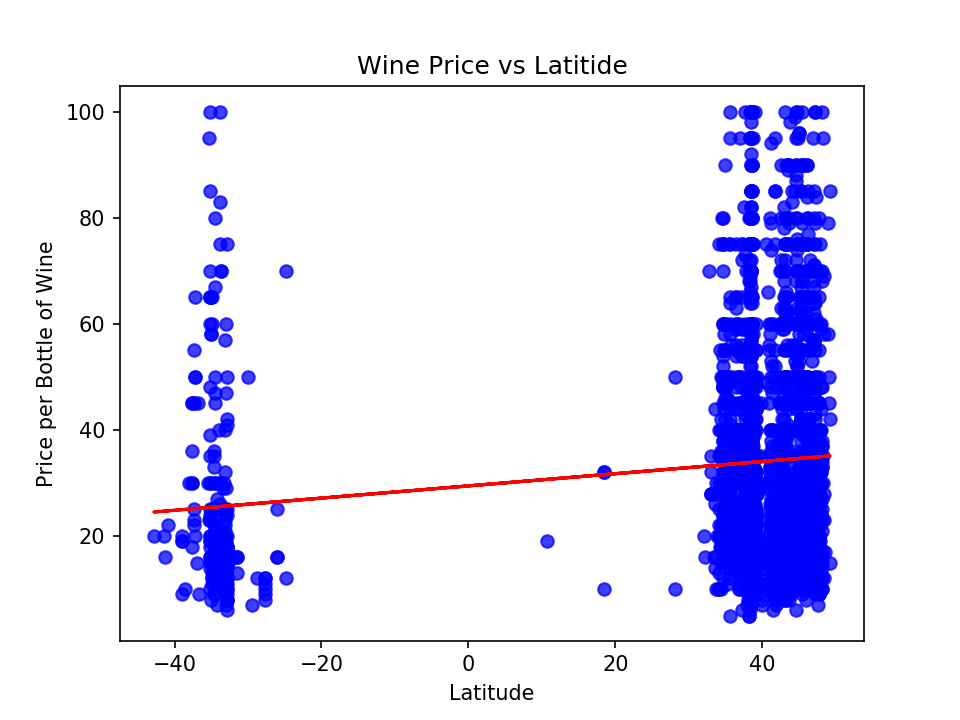

The correlation between both factors is 0.12
The r-squared is: 0.015506105074422814


In [36]:
fig = plt.figure()

# Create scatter plot based uponabove values
plt.scatter(sample["latitud"], sample["price"], marker="o", facecolors="b", alpha=0.75, label ="Price vs Latitude")

# Calculate correlation
correlation = round(st.pearsonr(sample["latitud"], sample["price"])[0],2)
print(f"The correlation between both factors is {correlation}")

# Calculate linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(sample["latitud"], sample["price"])
regress_values = sample["latitud"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.plot(sample["latitud"],regress_values,"r-")
plt.annotate(line_eq,(-20,150), fontsize=15,color="red")

#Lables
plt.title('Wine Price vs Latitide')
plt.xlabel("Latitude")
plt.ylabel('Price per Bottle of Wine')

# Print chart to screen
plt.show()
plt.savefig("Output/price_lat_regress.png")

<IPython.core.display.Javascript object>


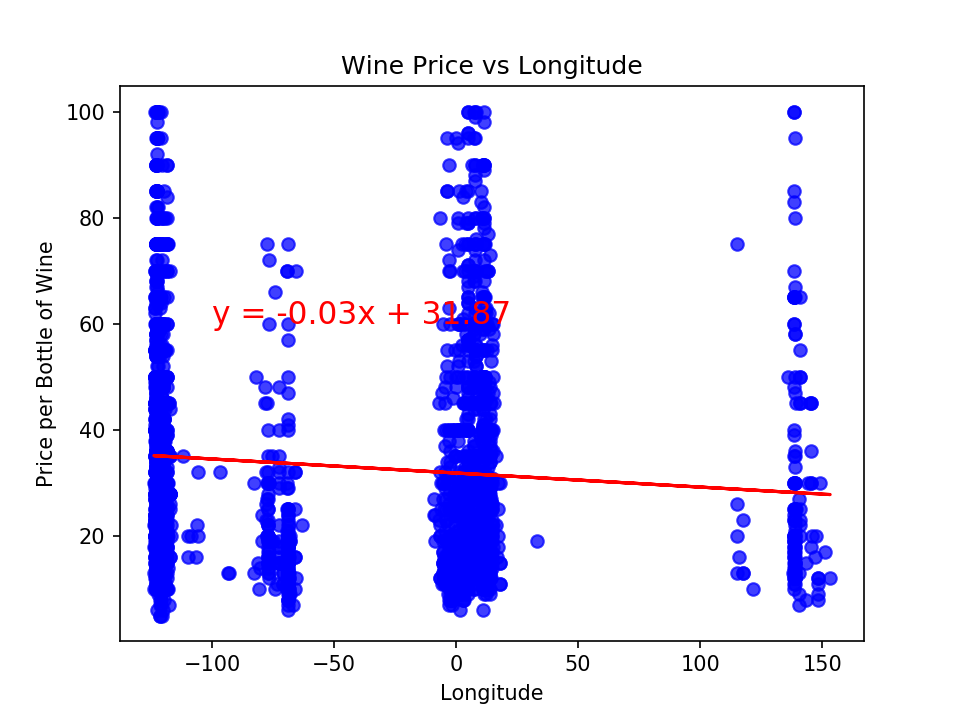

The correlation between both factors is -0.1
The r-squared is: 0.009471488415690064


In [37]:
fig = plt.figure()

# Create scatter plot based uponabove values
plt.scatter(sample["longitud"], sample["price"], marker="o", facecolors="b", alpha=0.75, label ="Price vs Longitude")

# Calculate correlation
correlation = round(st.pearsonr(sample["longitud"], sample["price"])[0],2)
print(f"The correlation between both factors is {correlation}")

# Calculate linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(sample["longitud"], sample["price"])
regress_values = sample["longitud"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.plot(sample["longitud"],regress_values,"r-")
plt.annotate(line_eq,(-100,60), fontsize=15,color="red")

#Lables
plt.title('Wine Price vs Longitude')
plt.xlabel("Longitude")
plt.ylabel('Price per Bottle of Wine')

# Print chart to screen
plt.show()
plt.savefig("Output/price_lng_regress.png")

<IPython.core.display.Javascript object>


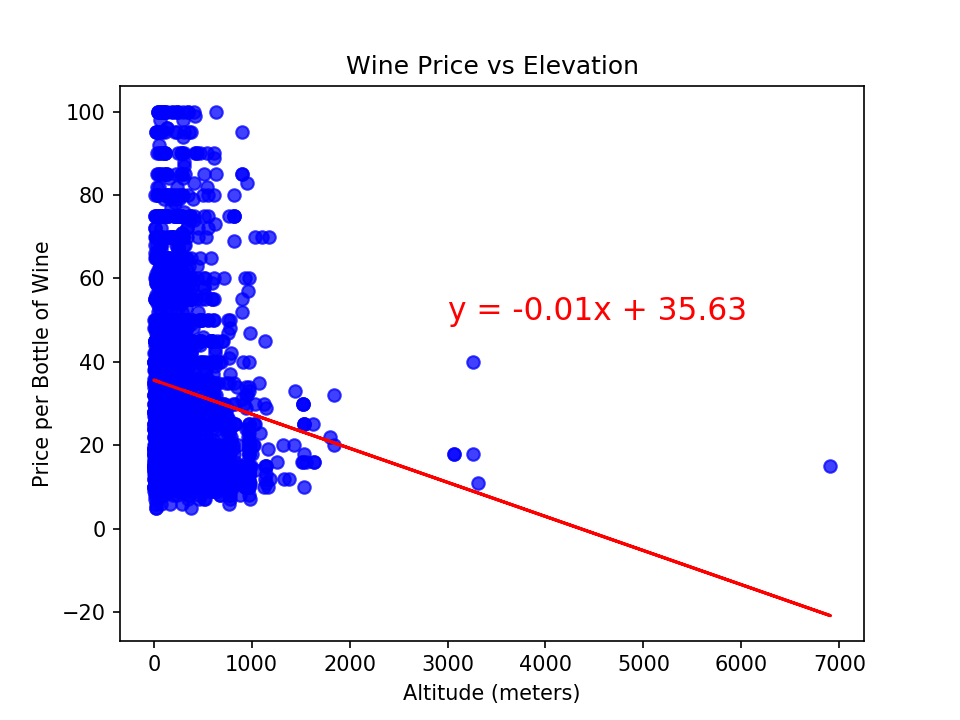

The correlation between both factors is -0.13
The r-squared is: 0.01709064379223488


In [38]:
fig = plt.figure()

# Create scatter plot based uponabove values
plt.scatter(sample["elevation"], sample["price"], marker="o", facecolors="b", alpha=0.75, label ="Price vs Elevation")

# Calculate correlation
correlation = round(st.pearsonr(sample["elevation"], sample["price"])[0],2)
print(f"The correlation between both factors is {correlation}")

# Calculate linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(sample["elevation"], sample["price"])
regress_values = sample["elevation"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.plot(sample["elevation"],regress_values,"r-")
plt.annotate(line_eq,(3000,50), fontsize=15,color="red")

#Lables
plt.title('Wine Price vs Elevation')
plt.xlabel("Altitude (meters)")
plt.ylabel('Price per Bottle of Wine')

# Print chart to screen
plt.show()
plt.savefig("Output/price_altitude_regress.png")

<IPython.core.display.Javascript object>


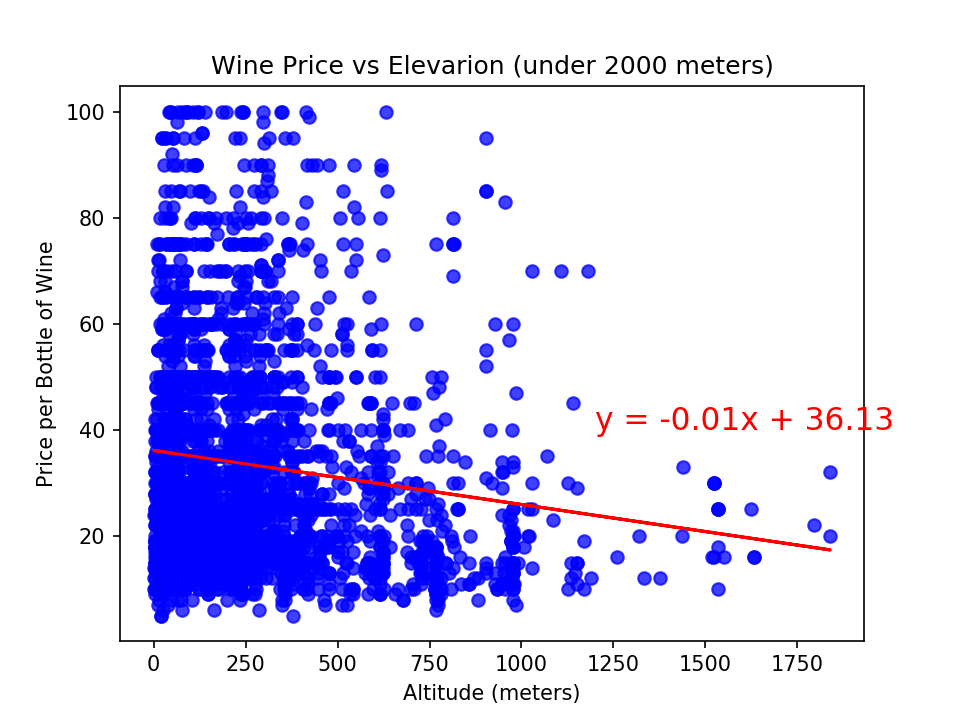

The correlation between both factors is -0.14
The r-squared is: 0.018599223214482468


In [39]:
cond1 = sample.loc[sample['elevation']<2000]

fig = plt.figure()

# Create scatter plot based uponabove values
plt.scatter(cond1["elevation"], cond1["price"], marker="o", facecolors="b", alpha=0.75, label ="Price vs Elevation")

# Calculate correlation
correlation = round(st.pearsonr(cond1["elevation"], cond1["price"])[0],2)
print(f"The correlation between both factors is {correlation}")

# Calculate linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(cond1["elevation"], cond1["price"])
regress_values = cond1["elevation"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.plot(cond1["elevation"],regress_values,"r-")
plt.annotate(line_eq,(1200,40), fontsize=15,color="red")

#Lables
plt.title('Wine Price vs Elevarion (under 2000 meters)')
plt.xlabel("Altitude (meters)")
plt.ylabel('Price per Bottle of Wine')

# Print chart to screen
plt.show()
plt.savefig("Output/price_altitudeunder2000_regress.png")

In [40]:
#Regress by Country
group1 = sample[sample["country"] == "Argentina"]["price"]

<IPython.core.display.Javascript object>


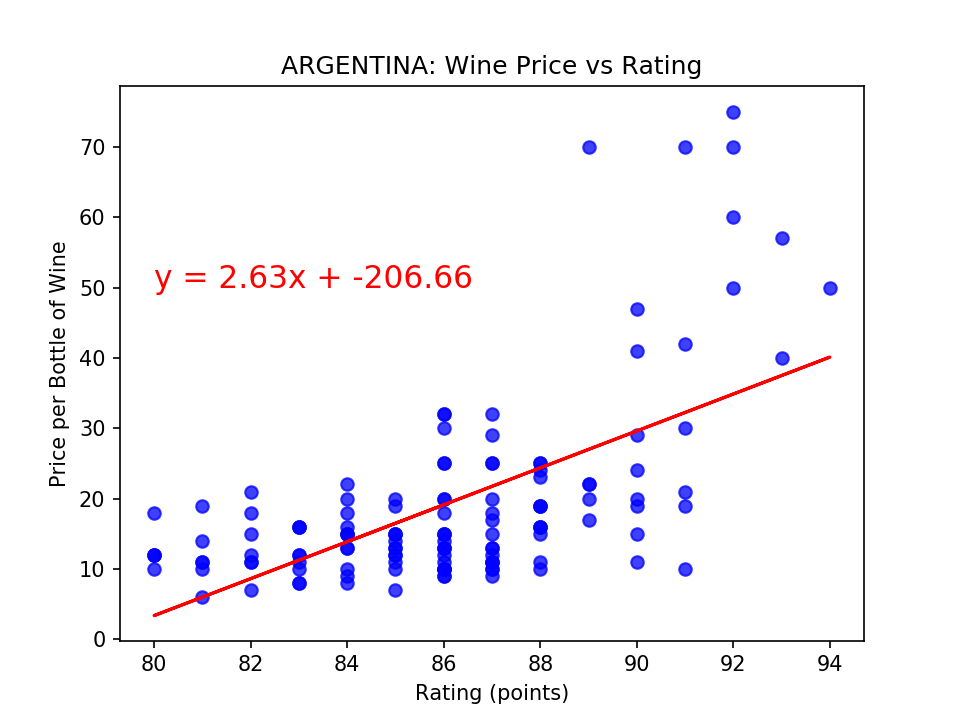

The correlation between both factors is 0.61
The r-squared is: 0.3724878603227943


In [41]:
fig = plt.figure()

# Create scatter plot based for Argentina
argentina = sample[sample["country"] == "Argentina"]
plt.scatter(argentina["points"], argentina["price"], marker="o", facecolors="b", alpha=0.75, label ="Price vs Ratings")

# Calculate correlation
correlation = round(st.pearsonr(argentina["points"], argentina["price"])[0],2)
print(f"The correlation between both factors is {correlation}")

# Calculate linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(argentina["points"], argentina["price"])
regress_values = argentina["points"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.plot(argentina["points"],regress_values,"r-")
plt.annotate(line_eq,(80,50), fontsize=15,color="red")

#Lables
plt.title('ARGENTINA: Wine Price vs Rating')
plt.xlabel("Rating (points)")
plt.ylabel('Price per Bottle of Wine')

# Print chart to screen
plt.show()
plt.savefig("Output/price_rating_Argentina.png")

<IPython.core.display.Javascript object>


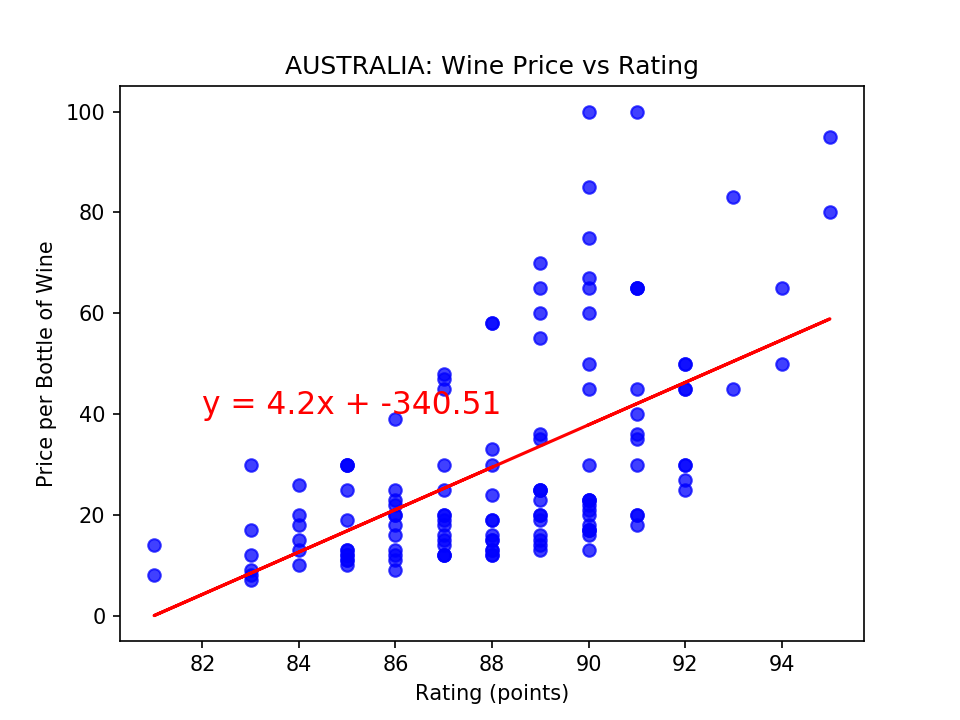

The correlation between both factors is 0.57
The r-squared is: 0.3222847769928225


In [42]:
fig = plt.figure()

# Create scatter plot based for Argentina
australia = sample[sample["country"] == "Australia"]
plt.scatter(australia["points"], australia["price"], marker="o", facecolors="b", alpha=0.75, label ="Price vs Ratings")

# Calculate correlation
correlation = round(st.pearsonr(australia["points"], australia["price"])[0],2)
print(f"The correlation between both factors is {correlation}")

# Calculate linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(australia["points"], australia["price"])
regress_values = australia["points"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.plot(australia["points"],regress_values,"r-")
plt.annotate(line_eq,(82,40), fontsize=15,color="red")

#Lables
plt.title('AUSTRALIA: Wine Price vs Rating')
plt.xlabel("Rating (points)")
plt.ylabel('Price per Bottle of Wine')

# Print chart to screen
plt.show()
plt.savefig("Output/price_rating_Australia.png")

<IPython.core.display.Javascript object>


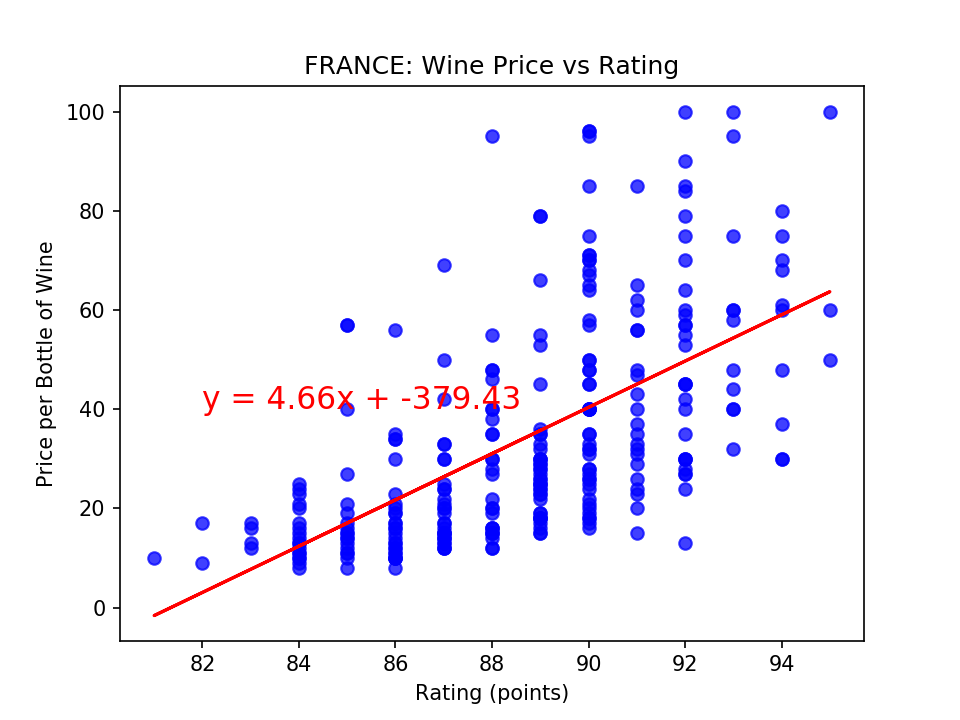

The correlation between both factors is 0.6
The r-squared is: 0.3629254372526378


In [43]:
fig = plt.figure()

# Create scatter plot based for Argentina
france = sample[sample["country"] == "France"]
plt.scatter(france["points"], france["price"], marker="o", facecolors="b", alpha=0.75, label ="Price vs Ratings")

# Calculate correlation
correlation = round(st.pearsonr(france["points"], france["price"])[0],2)
print(f"The correlation between both factors is {correlation}")

# Calculate linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(france["points"], france["price"])
regress_values = france["points"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.plot(france["points"],regress_values,"r-")
plt.annotate(line_eq,(82,40), fontsize=15,color="red")

#Lables
plt.title('FRANCE: Wine Price vs Rating')
plt.xlabel("Rating (points)")
plt.ylabel('Price per Bottle of Wine')

# Print chart to screen
plt.show()
plt.savefig("Output/price_rating_France.png")

<IPython.core.display.Javascript object>


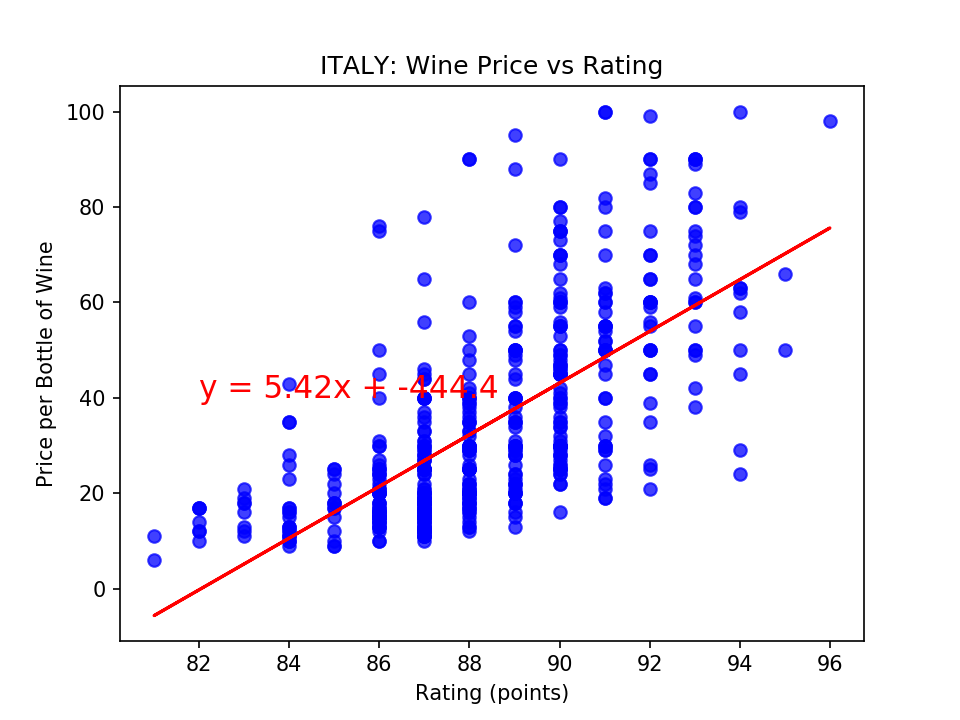

The correlation between both factors is 0.67
The r-squared is: 0.44695987199960985


In [44]:
fig = plt.figure()

# Create scatter plot based for Argentina
italy = sample[sample["country"] == "Italy"]
plt.scatter(italy["points"], italy["price"], marker="o", facecolors="b", alpha=0.75, label ="Price vs Ratings")

# Calculate correlation
correlation = round(st.pearsonr(italy["points"], italy["price"])[0],2)
print(f"The correlation between both factors is {correlation}")

# Calculate linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(italy["points"], italy["price"])
regress_values = italy["points"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.plot(italy["points"],regress_values,"r-")
plt.annotate(line_eq,(82,40), fontsize=15,color="red")

#Lables
plt.title('ITALY: Wine Price vs Rating')
plt.xlabel("Rating (points)")
plt.ylabel('Price per Bottle of Wine')

# Print chart to screen
plt.show()
plt.savefig("Output/price_rating_Italy.png")

<IPython.core.display.Javascript object>


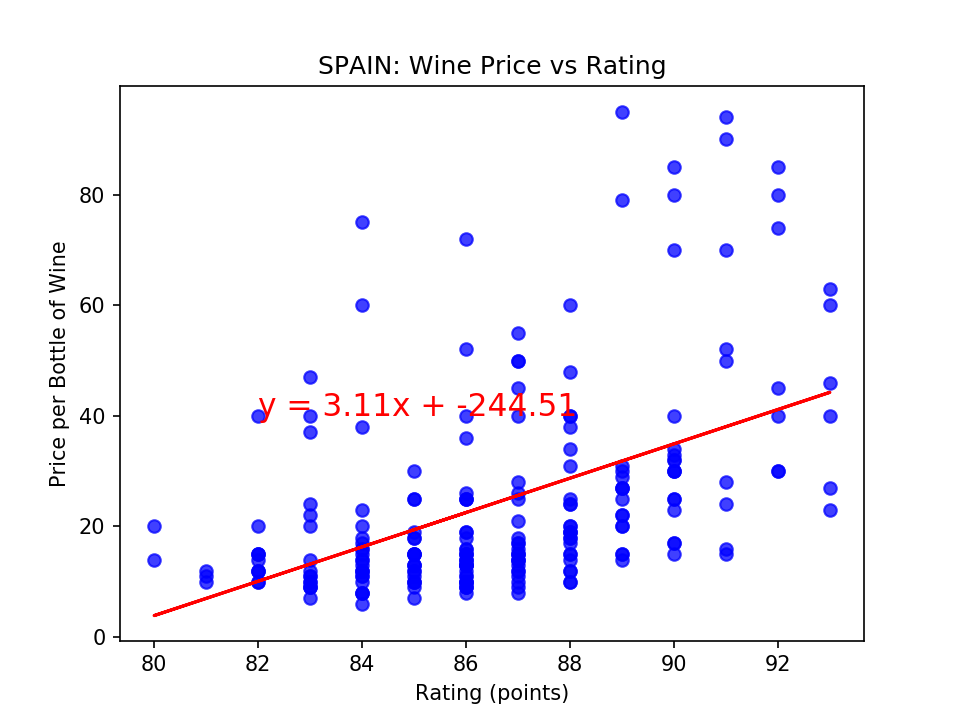

The correlation between both factors is 0.48
The r-squared is: 0.23221956621624312


In [45]:
fig = plt.figure()

# Create scatter plot based for Argentina
spain = sample[sample["country"] == "Spain"]
plt.scatter(spain["points"], spain["price"], marker="o", facecolors="b", alpha=0.75, label ="Price vs Ratings")

# Calculate correlation
correlation = round(st.pearsonr(spain["points"], spain["price"])[0],2)
print(f"The correlation between both factors is {correlation}")

# Calculate linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(spain["points"], spain["price"])
regress_values = spain["points"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.plot(spain["points"],regress_values,"r-")
plt.annotate(line_eq,(82,40), fontsize=15,color="red")

#Lables
plt.title('SPAIN: Wine Price vs Rating')
plt.xlabel("Rating (points)")
plt.ylabel('Price per Bottle of Wine')

# Print chart to screen
plt.show()
plt.savefig("Output/price_rating_Spain.png")

<IPython.core.display.Javascript object>


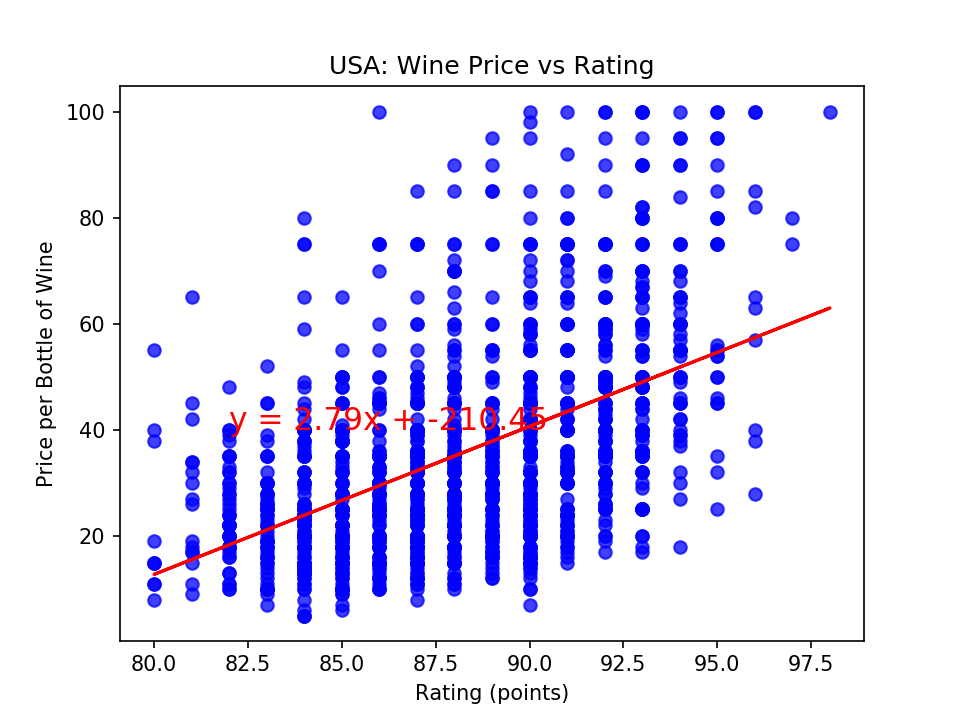

The correlation between both factors is 0.51
The r-squared is: 0.2553412894715367


In [46]:
fig = plt.figure()

# Create scatter plot based for Argentina
US = sample[sample["country"] == "US"]
plt.scatter(US["points"], US["price"], marker="o", facecolors="b", alpha=0.75, label ="Price vs Ratings")

# Calculate correlation
correlation = round(st.pearsonr(US["points"], US["price"])[0],2)
print(f"The correlation between both factors is {correlation}")

# Calculate linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(US["points"], US["price"])
regress_values = US["points"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.plot(US["points"],regress_values,"r-")
plt.annotate(line_eq,(82,40), fontsize=15,color="red")

#Lables
plt.title('USA: Wine Price vs Rating')
plt.xlabel("Rating (points)")
plt.ylabel('Price per Bottle of Wine')

# Print chart to screen
plt.show()
plt.savefig("Output/price_rating_USA.png")

In [47]:
### setup Statsmodels Linear Regression for points###
y = sample['price']
X = sample[['points', "latitud", "longitud", "elevation"]]
X = sm.add_constant(X)

model = sm.OLS(y,X)
fitted = model.fit()
print (fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     329.5
Date:                Tue, 04 Aug 2020   Prob (F-statistic):          1.16e-232
Time:                        21:03:50   Log-Likelihood:                -11867.
No. Observations:                2809   AIC:                         2.374e+04
Df Residuals:                    2804   BIC:                         2.377e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -268.0631      8.688    -30.855      0.0

In [48]:
### setup Statsmodels Linear Regression for points###
y = sample['price']
X = sample[['points']]
X = sm.add_constant(X)

model = sm.OLS(y,X)
fitted = model.fit()
print (fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     1261.
Date:                Tue, 04 Aug 2020   Prob (F-statistic):          1.76e-228
Time:                        21:03:59   Log-Likelihood:                -11887.
No. Observations:                2809   AIC:                         2.378e+04
Df Residuals:                    2807   BIC:                         2.379e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -272.5440      8.621    -31.613      0.0

In [49]:
x = sample["country"]
y = sample["price"]
x = pd.concat([sample,pd.get_dummies(data=x, drop_first=True, prefix="country")], axis=1)
x = x[["points", "latitud", "longitud", "elevation","country_Australia", "country_France", "country_Italy","country_Spain", "country_US"]]
#x = sm.add_constant(x)

#OneHotEncoder().fit_transform(x).toarray()
print(x)

model = sm.OLS(y,x)
fitted = model.fit()
print (fitted.summary())

      points    latitud    longitud   elevation  country_Australia  \
0         88 -34.561592  138.975437  323.242493                  1   
1         87  42.608611   11.696667  354.988892                  0   
2         87  35.577261 -120.722921  280.324707                  0   
3         90  38.245822 -122.315023   16.873728                  0   
4         88  37.599994   14.015356  622.540649                  0   
...      ...        ...         ...         ...                ...   
2995      84  48.126568    7.283714  236.638031                  0   
2996      90 -34.584690  117.643484  277.881836                  1   
2997      88  38.488605 -122.407172   58.626724                  0   
2998      94  38.403776 -122.820387   23.158340                  0   
2999      94  45.214049 -123.187830   46.796600                  0   

      country_France  country_Italy  country_Spain  country_US  
0                  0              0              0           0  
1                  0         

In [50]:
x = sample["country"]
y = sample["price"]
x = pd.concat([sample,pd.get_dummies(data=x, drop_first=True, prefix="country")], axis=1)
x = x[["points","country_Australia", "country_France", "country_Italy","country_Spain", "country_US"]]
#x = sm.add_constant(x)

#OneHotEncoder().fit_transform(x).toarray()
print(x)

model = sm.OLS(y,x)
fitted = model.fit()
print (fitted.summary())

      points  country_Australia  country_France  country_Italy  country_Spain  \
0         88                  1               0              0              0   
1         87                  0               0              1              0   
2         87                  0               0              0              0   
3         90                  0               0              0              0   
4         88                  0               0              1              0   
...      ...                ...             ...            ...            ...   
2995      84                  0               1              0              0   
2996      90                  1               0              0              0   
2997      88                  0               0              0              0   
2998      94                  0               0              0              0   
2999      94                  0               0              0              0   

      country_US  
0       

In [51]:
#Testing DataBase - Random Data - CAN SKIP IF ALREADY HAVE DATASET
test = data.sample(n=1000, axis=0, random_state = 21)
test.reset_index(drop = True, inplace=True)
test.head()

,designation,winery,variety,region_1,province,country,price,points
0,Enrico VI,Cordero di Montezemolo,Nebbiolo,Barolo,Piedmont,Italy,75.0,93
1,Reserva,Anciano,Tempranillo,Valdepeñas,Central Spain,Spain,12.0,86
2,Serra Lori,Argiolas,Rosé,Isola dei Nuraghi,Sicily & Sardinia,Italy,16.0,85
3,Parcela 12 Single Vineyard,Finca Constancia,Graciano,Vino de la Tierra de Castilla,Central Spain,Spain,20.0,87
4,Late Harvest,J. Lohr,White Riesling,Arroyo Seco,California,US,25.0,90


In [ ]:
#SKIP IF ALREADY HAVE DATASET**********
#Add Lat, Lng and Elevation columns
test["latitud"] = ""
test["longitud"] = ""
test["elevation"] = ""

# Build URL using the Google Geocoding API
base_url = "https://maps.googleapis.com/maps/api/geocode/json"

# Counter
count = 1

# Iterate dataframe for filling Latitud and Longitud columns
for index, row in test.iterrows():
    
    # Build winery location search
    winery_loc = row["winery"] + "," + row["region_1"]  + "," +  row["province"]
    
    # Parameters for API request
    params = {"address": winery_loc, "key": gkey}
    
    try:

        # Run request
        response = requests.get(base_url, params=params)

        # Convert to JSON
        geo_data = response.json()

        # Extract lat/lng and fill columns
        test.loc[index, 'latitud'] = geo_data["results"][0]["geometry"]["location"]["lat"]
        test.loc[index, 'longitud'] = geo_data["results"][0]["geometry"]["location"]["lng"]
    
        # print Winery location found
        print(f"Processing row {count} Winery location {winery_loc} {test.loc[index, 'latitud']} {test.loc[index, 'longitud']} found")
        count += 1
        
    except (KeyError, IndexError):
        print("Winery not found" )
        

# Counter
count = 1

# Iterate dataframe for filling Elevation column
for index, row in test.iterrows():
    lat = row["latitud"]
    lng = row["longitud"]
    
    try:
        # Build URL using the Google Elevation API
        url_ele = f"https://maps.googleapis.com/maps/api/elevation/json?locations={lat},{lng}&key={gkey}"
        
        # Run request
        response = requests.get(url_ele)

        # Convert to JSON
        geo_data = response.json()

        # Extract elevation and fill column
        test.loc[index, 'elevation'] = geo_data["results"][0]["elevation"]
    
        # print Winery elevation found
        print(f"Processing row {count} Winery elevation {test.loc[index, 'elevation']} found")
        count += 1
        
    except (KeyError, IndexError):
        print("Elevation not found" )



test.to_csv("Resources/testing_winery_data.csv", index=False)

In [52]:
test = pd.read_csv("Resources/testing_winery_data.csv") 
test.dropna(inplace=True)
print(test.count())
test.head()

designation    970
winery         970
variety        970
region_1       970
province       970
country        970
price          970
points         970
latitud        970
longitud       970
elevation      970
dtype: int64


,designation,winery,variety,region_1,province,country,price,points,latitud,longitud,elevation
0,Enrico VI,Cordero di Montezemolo,Nebbiolo,Barolo,Piedmont,Italy,75.0,93,44.640950,7.958492,277.228241
1,Reserva,Anciano,Tempranillo,Valdepeñas,Central Spain,Spain,12.0,86,38.760524,-3.387607,705.378479
2,Serra Lori,Argiolas,Rosé,Isola dei Nuraghi,Sicily & Sardinia,Italy,16.0,85,37.599994,14.015356,622.540649
3,Parcela 12 Single Vineyard,Finca Constancia,Graciano,Vino de la Tierra de Castilla,Central Spain,Spain,20.0,87,40.443075,-3.714071,688.828613
4,Late Harvest,J. Lohr,White Riesling,Arroyo Seco,California,US,25.0,90,35.690882,-120.641421,236.122559


In [53]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
bycountry = pd.DataFrame(test["price"].groupby(test['country']).count())
bycountry

,price
country,
Argentina,47
Australia,37
Canada,5
France,122
Italy,177
Spain,78
US,504


In [112]:
#Drop Canada from Sample
test = test[test.country != "Canada"]
print(test.count())

designation    965
winery         965
variety        965
region_1       965
province       965
country        965
price          965
points         965
latitud        965
longitud       965
elevation      965
dtype: int64


In [113]:
#Drop Prices under $100
test = test[test.price <= 100]
print(test.count())

designation    936
winery         936
variety        936
region_1       936
province       936
country        936
price          936
points         936
latitud        936
longitud       936
elevation      936
dtype: int64


In [114]:
test_x = test["country"]
test_x = pd.concat([test,pd.get_dummies(data=test_x, drop_first=True, prefix="country")], axis=1)
test_x = test_x[["price", "points", "latitud", "longitud", "elevation","country_Australia", "country_France", "country_Italy","country_Spain","country_US"]]
#x = sm.add_constant(x)

#OneHotEncoder().fit_transform(x).toarray()
test_x.head(5)

,price,points,latitud,longitud,elevation,country_Australia,country_France,country_Italy,country_Spain,country_US
0,75.0,93,44.640950,7.958492,277.228241,0,0,1,0,0
1,12.0,86,38.760524,-3.387607,705.378479,0,0,0,1,0
2,16.0,85,37.599994,14.015356,622.540649,0,0,1,0,0
3,20.0,87,40.443075,-3.714071,688.828613,0,0,0,1,0
4,25.0,90,35.690882,-120.641421,236.122559,0,0,0,0,1


In [115]:
test_x["price_forecast"] =""
test_x.head(5)

,price,points,latitud,longitud,elevation,country_Australia,country_France,country_Italy,country_Spain,country_US,price_forecast
0,75.0,93,44.640950,7.958492,277.228241,0,0,1,0,0,
1,12.0,86,38.760524,-3.387607,705.378479,0,0,0,1,0,
2,16.0,85,37.599994,14.015356,622.540649,0,0,1,0,0,
3,20.0,87,40.443075,-3.714071,688.828613,0,0,0,1,0,
4,25.0,90,35.690882,-120.641421,236.122559,0,0,0,0,1,


In [130]:
test_x["price_forecast"] = (test_x["points"]*.51) + (test_x["latitud"]*.2148) + (test_x["longitud"]*.1092) + (test_x["elevation"]*-.0052)  + (test_x["country_Australia"]*-21.4376) + (test_x["country_France"]*-20.1779) + (test_x["country_Italy"]*-19.9438) + (test_x["country_Spain"]*-25.4182)
test_x


,price,points,latitud,longitud,elevation,country_Australia,country_France,country_Italy,country_Spain,country_US,price_forecast
0,75.0,93,44.640950,7.958492,277.228241,0,0,1,0,0,36.502557
1,12.0,86,38.760524,-3.387607,705.378479,0,0,0,1,0,22.729666
2,16.0,85,37.599994,14.015356,622.540649,0,0,1,0,0,29.775944
3,20.0,87,40.443075,-3.714071,688.828613,0,0,0,1,0,23.651487
4,25.0,90,35.690882,-120.641421,236.122559,0,0,0,0,1,39.164521
...,...,...,...,...,...,...,...,...,...,...,...
995,50.0,89,45.376228,-123.037326,404.493347,0,0,0,0,1,39.597772
996,48.0,87,38.643443,-122.917528,48.470818,0,0,0,0,1,38.995969
997,36.0,89,45.245624,-122.888048,36.160580,0,0,0,0,1,41.501350
998,40.0,90,38.321157,-122.343578,65.530540,0,0,0,0,1,40.430707


C:\Users\egarz\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


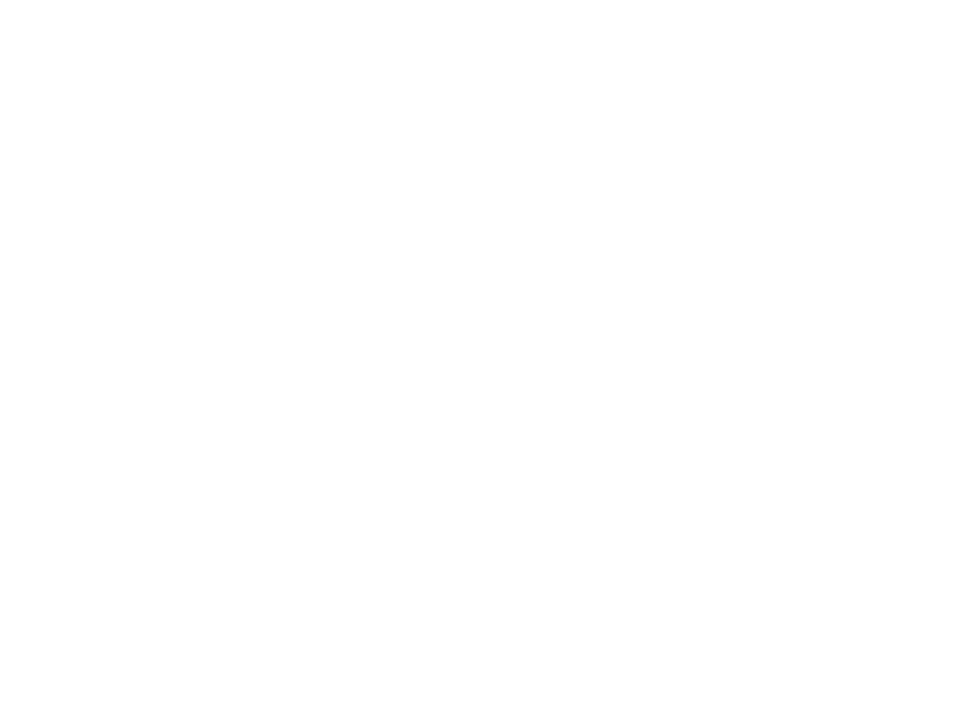

<IPython.core.display.Javascript object>


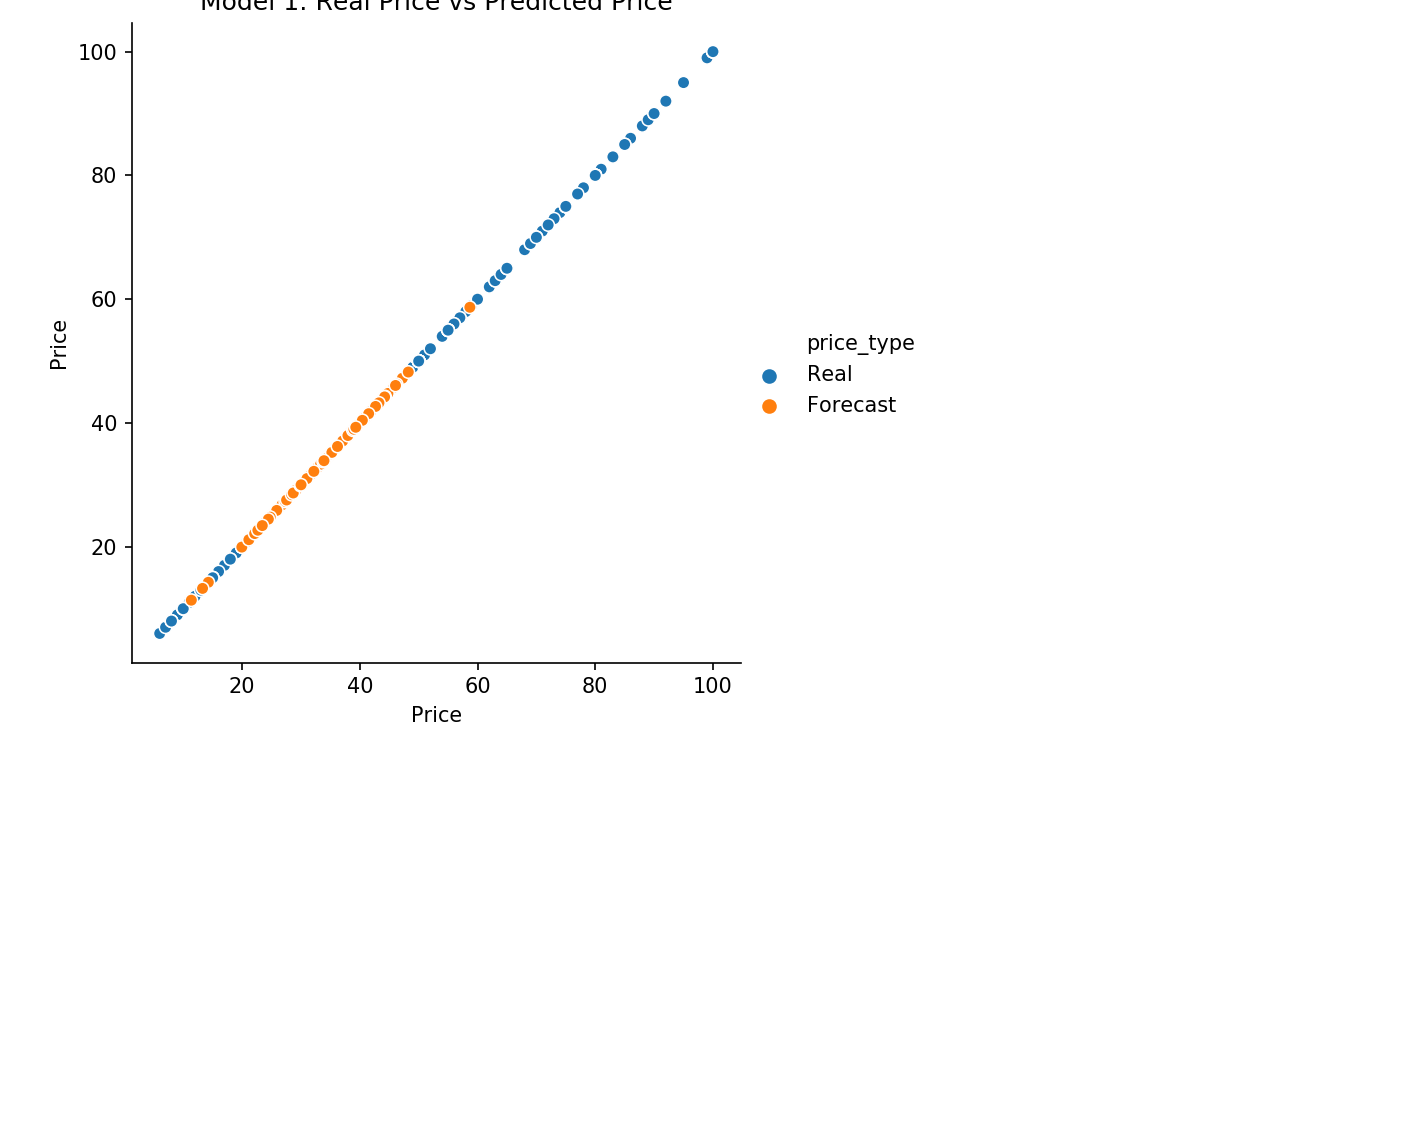

In [151]:
fig = plt.figure()
real = pd.DataFrame(test_x["price"])
real["price_type"] = "Real"
predicted = pd.DataFrame(test_x["price_forecast"])
predicted["price_type"] = "Forecast"
predicted.rename(columns={"price_forecast":"price"}, inplace=True)
frames = [real, predicted]
result = pd.concat(frames)
result
sns.relplot(x="price", y="price", hue="price_type", data=result)

#Lables
plt.title('Model 1: Real Price vs Predicted Price')
plt.xlabel("Price")
plt.ylabel('Price')

plt.savefig("Output/testingresults_model1.png")

In [118]:
#Modelo Regresion Simple con Rating
test_x["price_forecast"] = -272.5440 + (test_x["points"]*3.4733)
test_x

,price,points,latitud,longitud,elevation,country_Australia,country_France,country_Italy,country_Spain,country_US,price_forecast
0,75.0,93,44.640950,7.958492,277.228241,0,0,1,0,0,50.4729
1,12.0,86,38.760524,-3.387607,705.378479,0,0,0,1,0,26.1598
2,16.0,85,37.599994,14.015356,622.540649,0,0,1,0,0,22.6865
3,20.0,87,40.443075,-3.714071,688.828613,0,0,0,1,0,29.6331
4,25.0,90,35.690882,-120.641421,236.122559,0,0,0,0,1,40.0530
...,...,...,...,...,...,...,...,...,...,...,...
995,50.0,89,45.376228,-123.037326,404.493347,0,0,0,0,1,36.5797
996,48.0,87,38.643443,-122.917528,48.470818,0,0,0,0,1,29.6331
997,36.0,89,45.245624,-122.888048,36.160580,0,0,0,0,1,36.5797
998,40.0,90,38.321157,-122.343578,65.530540,0,0,0,0,1,40.0530


C:\Users\egarz\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


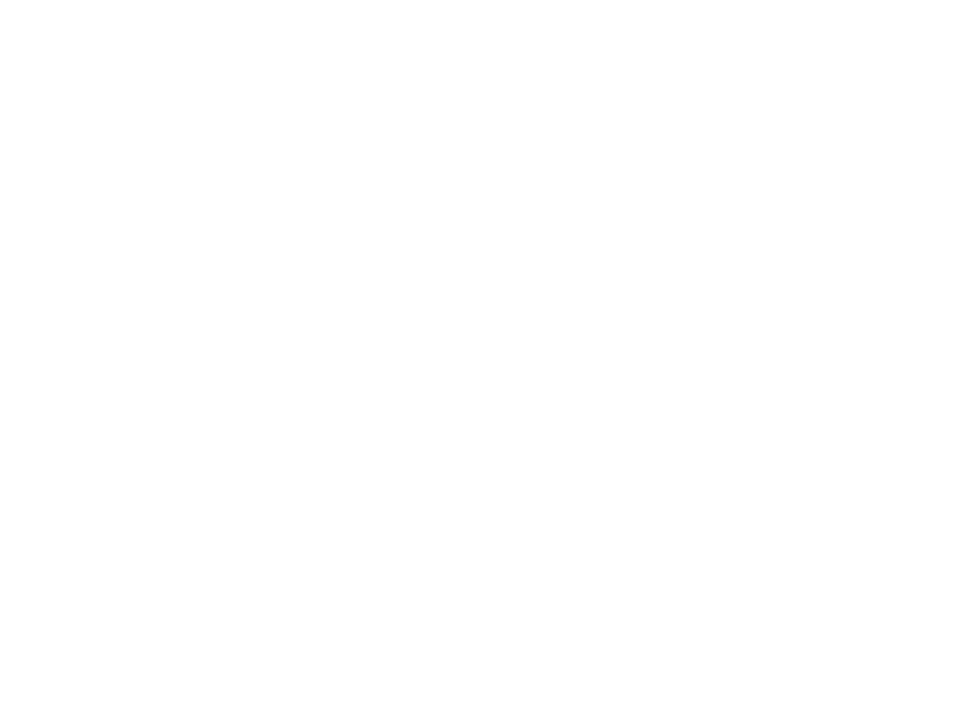

<IPython.core.display.Javascript object>


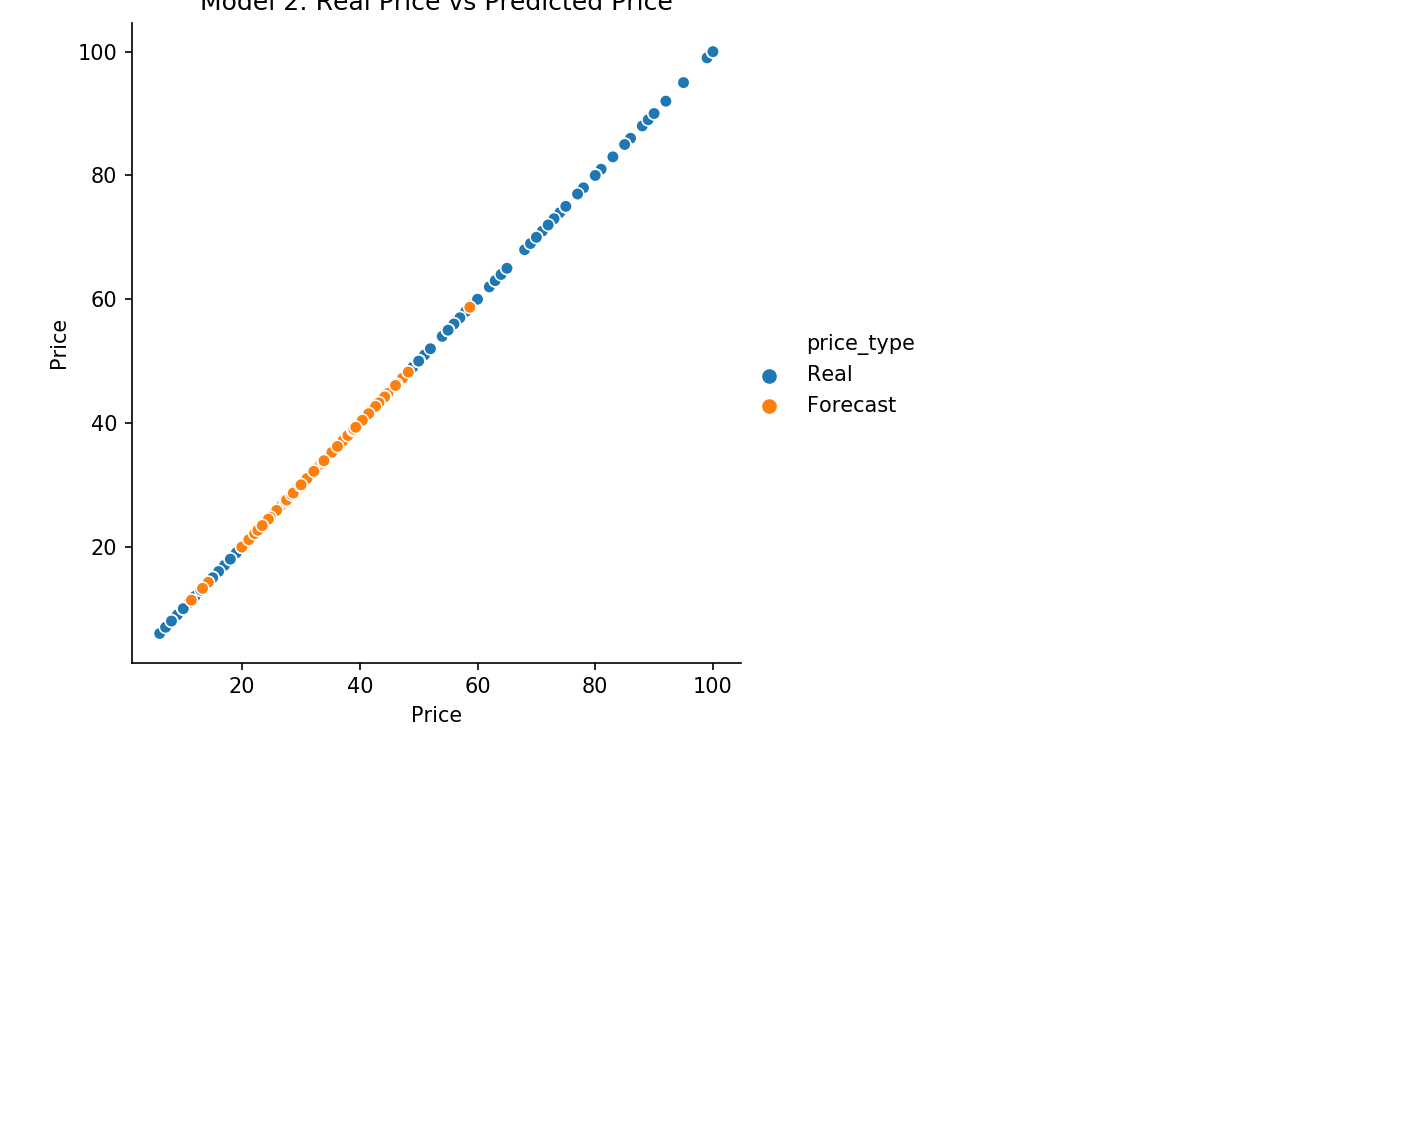

In [152]:
fig = plt.figure()
real = pd.DataFrame(test_x["price"])
real["price_type"] = "Real"
predicted = pd.DataFrame(test_x["price_forecast"])
predicted["price_type"] = "Forecast"
predicted.rename(columns={"price_forecast":"price"}, inplace=True)
frames = [real, predicted]
result = pd.concat(frames)
result
sns.relplot(x="price", y="price", hue="price_type", data=result)


#Lables
plt.title('Model 2: Real Price vs Predicted Price')
plt.xlabel("Price")
plt.ylabel('Price')

plt.savefig("Output/testingresults_model2.png")

In [120]:
#Modelo Regresion Múltiple sin geografía
test_x["price_forecast"] = -268.0631 + (test_x["points"]*3.4056) + (test_x["latitud"]*.0326) + (test_x["longitud"]*-.0175) + (test_x["elevation"]*-.0025) 
test_x

,price,points,latitud,longitud,elevation,country_Australia,country_France,country_Italy,country_Spain,country_US,price_forecast
0,75.0,93,44.640950,7.958492,277.228241,0,0,1,0,0,49.280651
1,12.0,86,38.760524,-3.387607,705.378479,0,0,0,1,0,24.377930
2,16.0,85,37.599994,14.015356,622.540649,0,0,1,0,0,20.837039
3,20.0,87,40.443075,-3.714071,688.828613,0,0,0,1,0,27.885469
4,25.0,90,35.690882,-120.641421,236.122559,0,0,0,0,1,41.125341
...,...,...,...,...,...,...,...,...,...,...,...
995,50.0,89,45.376228,-123.037326,404.493347,0,0,0,0,1,37.656485
996,48.0,87,38.643443,-122.917528,48.470818,0,0,0,0,1,31.513756
997,36.0,89,45.245624,-122.888048,36.160580,0,0,0,0,1,38.570447
998,40.0,90,38.321157,-122.343578,65.530540,0,0,0,0,1,41.667356


C:\Users\egarz\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


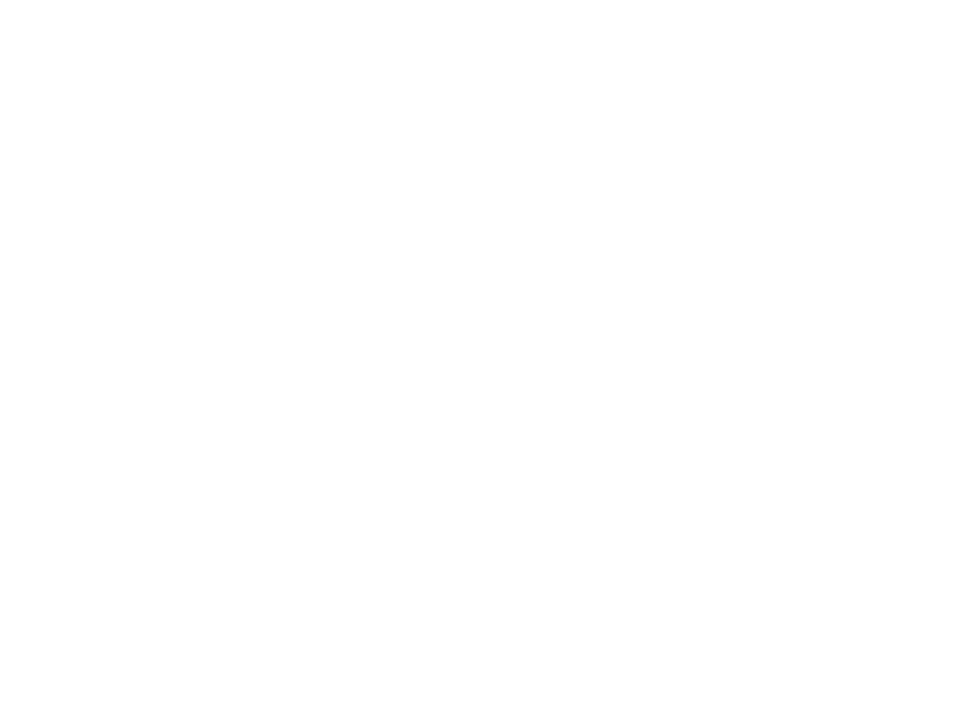

<IPython.core.display.Javascript object>


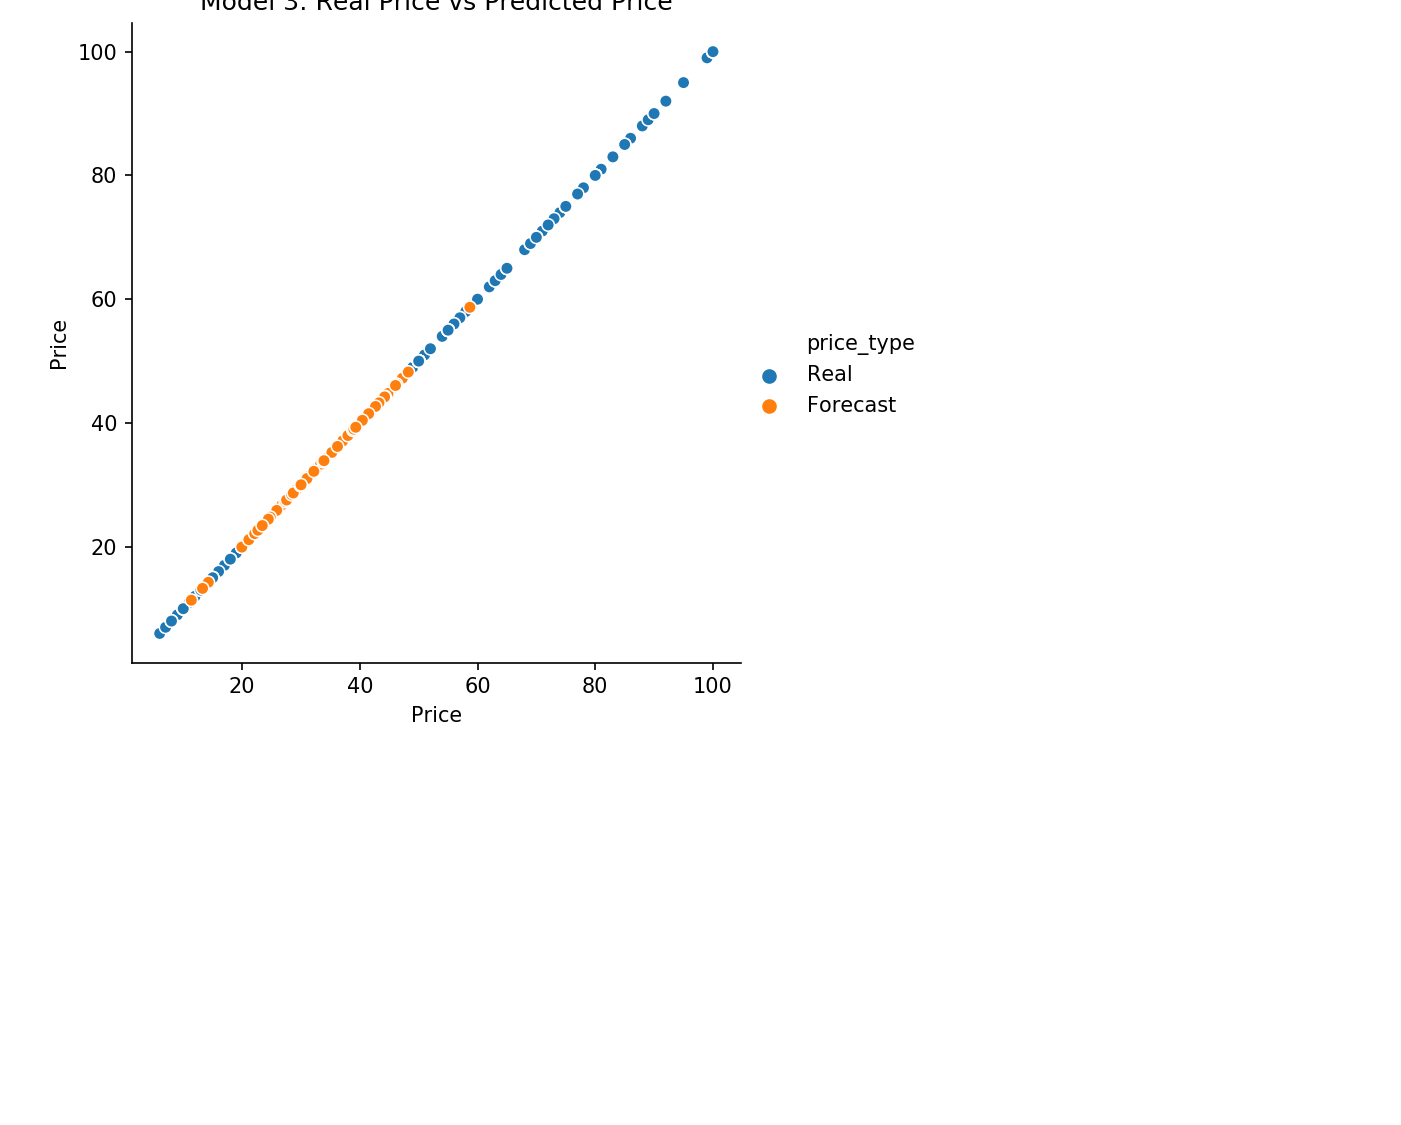

In [153]:
fig = plt.figure()
real = pd.DataFrame(test_x["price"])
real["price_type"] = "Real"
predicted = pd.DataFrame(test_x["price_forecast"])
predicted["price_type"] = "Forecast"
predicted.rename(columns={"price_forecast":"price"}, inplace=True)
frames = [real, predicted]
result = pd.concat(frames)
result
sns.relplot(x="price", y="price", hue="price_type", data=result)


#Lables
plt.title('Model 3: Real Price vs Predicted Price')
plt.xlabel("Price")
plt.ylabel('Price')

plt.savefig("Output/testingresults_model3.png")

In [128]:
#Modelo Rating plus Countries sin constante 
test_x["price_forecast"] = (test_x["points"]*.3124) + (test_x["country_France"]*6.5265) + (test_x["country_Italy"]*6.4399) + (test_x["country_US"]*8.2688)  
test_x

,price,points,latitud,longitud,elevation,country_Australia,country_France,country_Italy,country_Spain,country_US,price_forecast
0,75.0,93,44.640950,7.958492,277.228241,0,0,1,0,0,35.4931
1,12.0,86,38.760524,-3.387607,705.378479,0,0,0,1,0,26.8664
2,16.0,85,37.599994,14.015356,622.540649,0,0,1,0,0,32.9939
3,20.0,87,40.443075,-3.714071,688.828613,0,0,0,1,0,27.1788
4,25.0,90,35.690882,-120.641421,236.122559,0,0,0,0,1,36.3848
...,...,...,...,...,...,...,...,...,...,...,...
995,50.0,89,45.376228,-123.037326,404.493347,0,0,0,0,1,36.0724
996,48.0,87,38.643443,-122.917528,48.470818,0,0,0,0,1,35.4476
997,36.0,89,45.245624,-122.888048,36.160580,0,0,0,0,1,36.0724
998,40.0,90,38.321157,-122.343578,65.530540,0,0,0,0,1,36.3848


C:\Users\egarz\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


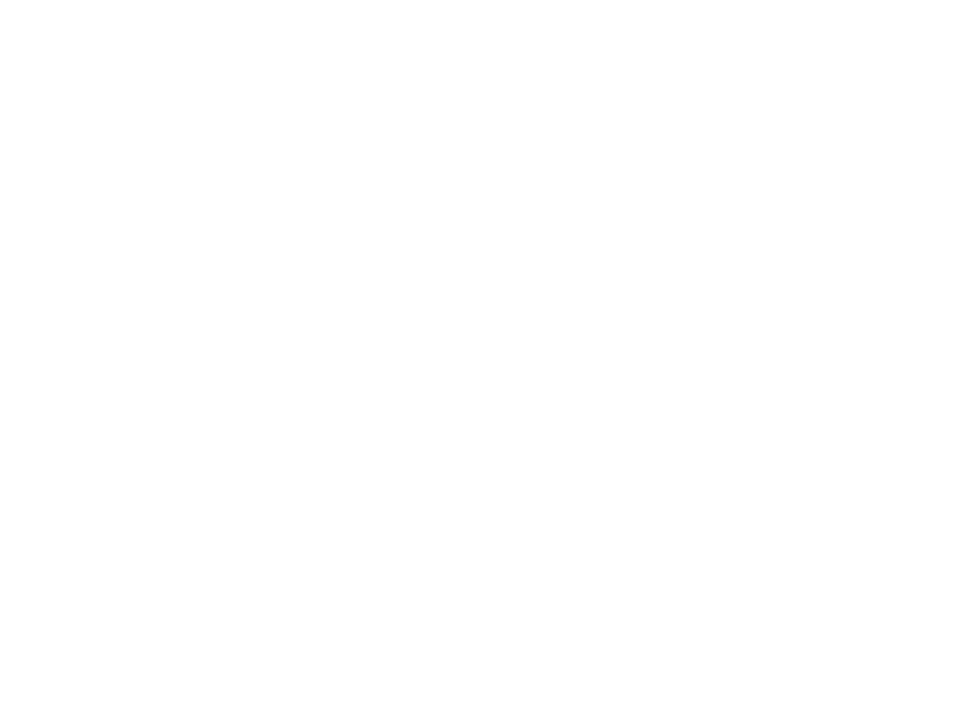

<IPython.core.display.Javascript object>


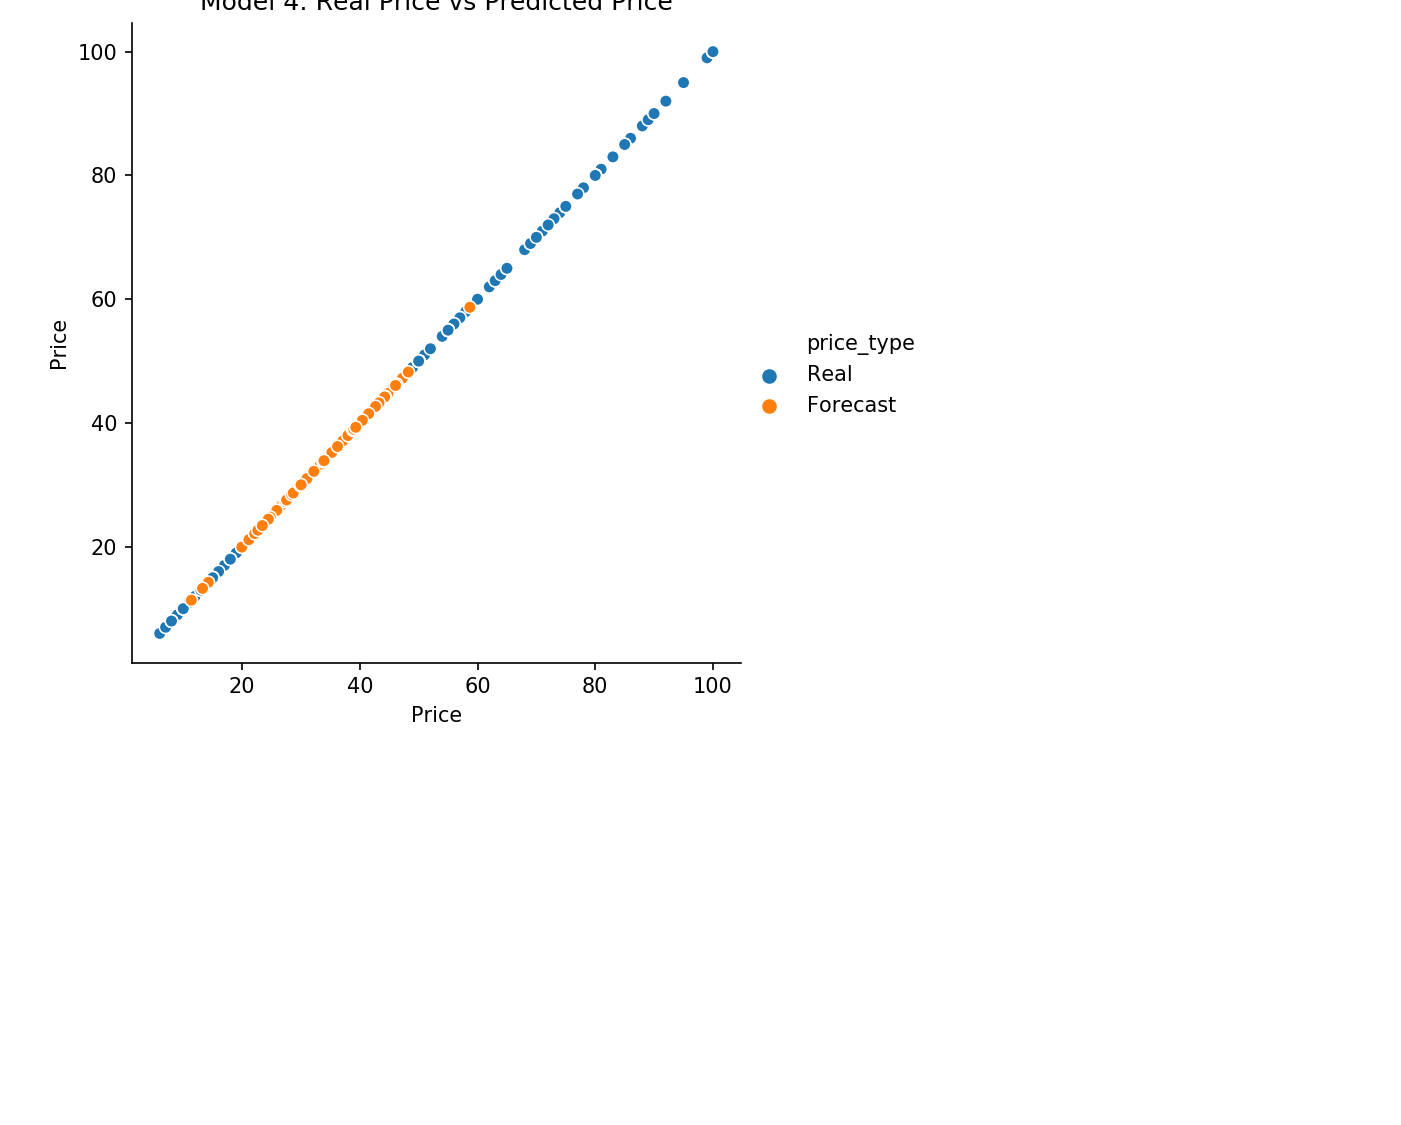

In [154]:
fig = plt.figure()
real = pd.DataFrame(test_x["price"])
real["price_type"] = "Real"
predicted = pd.DataFrame(test_x["price_forecast"])
predicted["price_type"] = "Forecast"
predicted.rename(columns={"price_forecast":"price"}, inplace=True)
frames = [real, predicted]
result = pd.concat(frames)
result
sns.relplot(x="price", y="price", hue="price_type", data=result)

#Lables
plt.title('Model 4: Real Price vs Predicted Price')
plt.xlabel("Price")
plt.ylabel('Price')

plt.savefig("Output/testingresults_model4.png")